In [264]:
# This was 
control = netCDF4.Dataset('timeseries/VLHC000kt/ANN.taijVLHC000kt.nc')
y = 15
earth_area = control['axyp'][y]
so2_factor = 1e3*earth_area/64.066
dms_factor = 1e3*earth_area/62
su_factor = 1e3*earth_area/96.06
h2so4_factor = 1e3*earth_area/98.079

# print('----- H2SO4 sources -----')
# print('H2SO4_chem: '+str(control['H2SO4_chem'][y]))

h2so4_vdict = {
    'H2SO4 sinks': [
        'H2SO4_wet_dep',
        'H2SO4_dry_dep',
        'H2SO4_gs_dep',
        'H2SO4_chem',
    ],
    'H2SO4 sources': [
        'AMP_src_H2SO4',
    ],
}

for vtype, vs in h2so4_vdict.items():
    print('----- '+vtype+' -----')
    total = 0
    for v in vs:
        val = control[v][y]*h2so4_factor
        print(v+': '+str(val))
        total += val
    print('Total: '+str(total))

so2_vdict = {
    'SO2 sources': [
        'SO2_AGR_CMIP6_src',
        'SO2_ENE_CMIP6_src',
        'SO2_IND_CMIP6_src',
        'SO2_RCO_CMIP6_src',
        'SO2_SHP_CMIP6_src',
        'SO2_SLV_CMIP6_src',
        'SO2_TRA_CMIP6_src',
        'SO2_WST_CMIP6_src',
        'SO2_aircraft_src',
        'SO2_biomass_src',
        'SO2_volcanic_src',
        'SO2_source_from_DMS',
    ],
    'SO2 sinks': [
        'SO2_wet_dep',
        'SO2_dry_dep',
        'SO2_aqchem',
        'SO2_chem_sink',
    ],
}

for vtype, vs in so2_vdict.items():
    print('----- '+vtype+' -----')
    total = 0
    for v in vs:
        val = control[v][y]*so2_factor
        print(v+': '+str(val))
        total += val
    print('Total: '+str(total))

tm = control['SO2_Total_Mass'][y]*so2_factor
# print('Total mass: '+str(tm))
print('Lifetime (days): '+str(tm/total/86400))
    
su_vdict = {
    'SU sources': [
        'SU_AGR_CMIP6_src',
        'SU_ENE_CMIP6_src',
        'SU_IND_CMIP6_src',
        'SU_RCO_CMIP6_src',
        'SU_SHP_CMIP6_src',
        'SU_SLV_CMIP6_src',
        'SU_TRA_CMIP6_src',
        'SU_WST_CMIP6_src',
        'SU_aircraft_src',
        'SU_biomass_src',
        'SU_volcanic_src',
        'SU_aqchem',
        'AMP_src_M',
    ],
    'SU sinks': [
        'SU_wet_dep',
        'SU_dry_dep',
        'SU_gs_dep',
    ],
}

for vtype, vs in su_vdict.items():
    print('----- '+vtype+' -----')
    total = 0
    for v in vs:
#         modes = [x for x in control.variables.keys() if v in x and 'SU' in x]
#         print(modes)
        val = sum([abs(control[x][y])*su_factor for x in control.variables.keys() if v in x and 'SU' in x])
        print(v+': '+str(val))
        total += val
    print('Total: '+str(total))

# print([v for v in control.variables.keys() if 'SU_Total_Mass' in v])
tm = sum([control[v][y]*su_factor for v in control.variables.keys() if 'SU_Total_Mass' in v])
# print('Total mass: '+str(tm))
print('Lifetime (days): '+str(tm/total/86400))

print('----- DMS sources -----')
print('DMS_ocean_src: '+str(control['DMS_ocean_src'][y]*dms_factor))
print('----- DMS sinks -----')
print('DMS_chem: '+str(abs(control['DMS_chem'][y])*dms_factor))

# 2.5% of SO2 emissions becomes sulfate directly
# (SU/1.5)/(SU/1.5 + SO2) = .025
# DMS molecular weight is 62
# DMS_chem
# also track H2SO4 sources and sinks
# oceanic source of DMS
# use units of moles, divide by molecular weights

# include AMP_src_H2SO4

----- H2SO4 sinks -----
H2SO4_wet_dep: 152.90866503390023
H2SO4_dry_dep: 18.503227085886607
H2SO4_gs_dep: 0.02006368609866254
H2SO4_chem: 9351.636369413136
Total: 9523.068325219021
----- H2SO4 sources -----
AMP_src_H2SO4: -9180.579662816554
Total: -9180.579662816554
----- SO2 sources -----
SO2_AGR_CMIP6_src: 0.0
SO2_ENE_CMIP6_src: 161.3170229354784
SO2_IND_CMIP6_src: 544.8401818304895
SO2_RCO_CMIP6_src: 452.3516648912802
SO2_SHP_CMIP6_src: 35.10182578294663
SO2_SLV_CMIP6_src: 0.0
SO2_TRA_CMIP6_src: 9.06357400331992
SO2_WST_CMIP6_src: 0.0
SO2_aircraft_src: 0.0
SO2_biomass_src: 973.8906708551838
SO2_volcanic_src: 12168.081928541615
SO2_source_from_DMS: 23649.09782481725
Total: 37993.744693657565
----- SO2 sinks -----
SO2_wet_dep: 9.282689484202246
SO2_dry_dep: 21643.48119752703
SO2_aqchem: -6990.271403344295
SO2_chem_sink: -9349.532575480243
Total: 5312.959908186696
Lifetime (days): 38.89356560247733
----- SU sources -----
SU_AGR_CMIP6_src: 0.0
SU_ENE_CMIP6_src: 4.138012789887743
SU_IND_

In [79]:
def plot_map(data,label,cmap='jet',):
    plt.rcParams["figure.figsize"] = (10,10)
    fig=plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())

    im = ax.pcolormesh(nc['lon'], nc['lat'], data, cmap=cmap)

    ax.add_feature(cartopy.feature.COASTLINE)

    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax, label=label)
    plt.show()

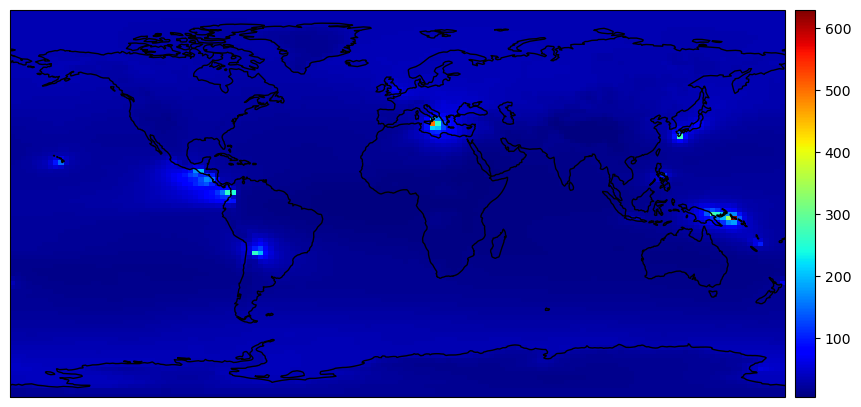

In [73]:
# budget sanity checks
from matplotlib import pyplot as plt
import netCDF4
import cartopy
import cartopy.crs as ccrs

fp='ANN0020.taijVLHC011kt.nc'
test_2d = netCDF4.Dataset(fp)

fp='ANN0020.taijVLHC000kt.nc'
control_2d = netCDF4.Dataset(fp)

plot_map(test_2d['SO2_Total_Mass'])

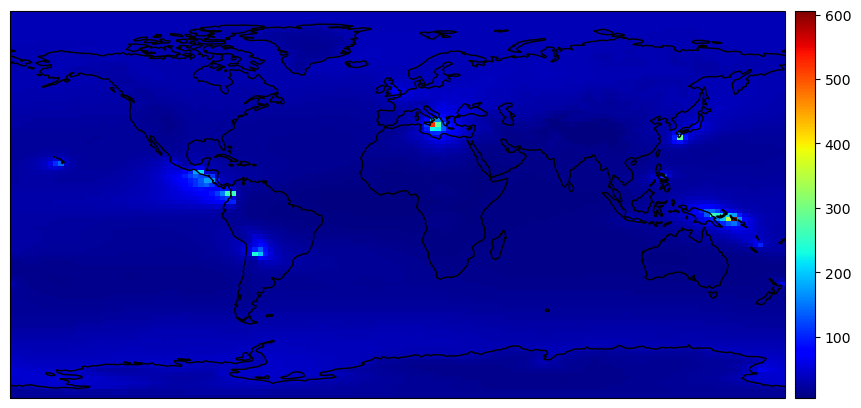

In [74]:
plot_map(control_2d['SO2_Total_Mass'])

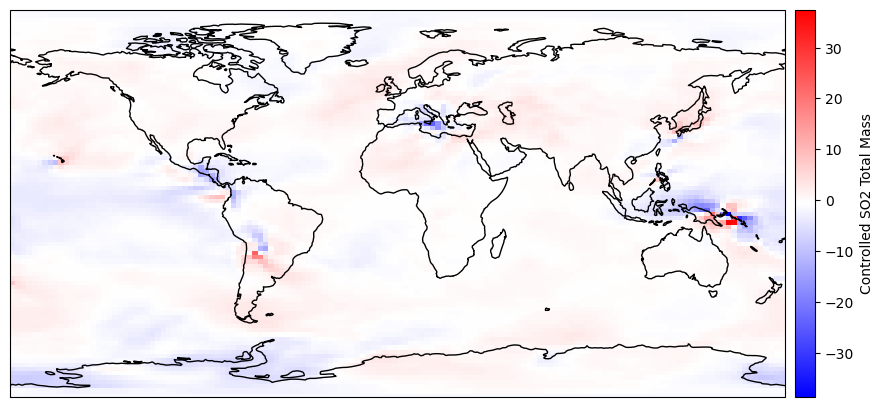

In [80]:
plot_map(test_2d['SO2_Total_Mass'][:] - control_2d['SO2_Total_Mass'][:], cmap='bwr', label='Controlled SO2 Total Mass')

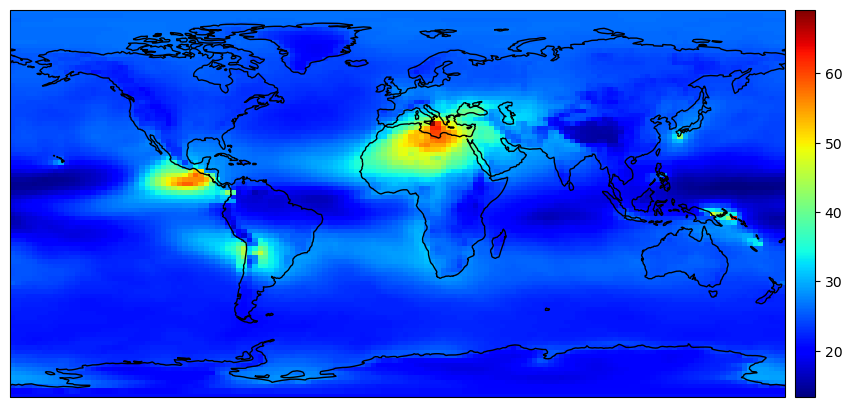

In [75]:
plot_map(su_tm_test_2d)

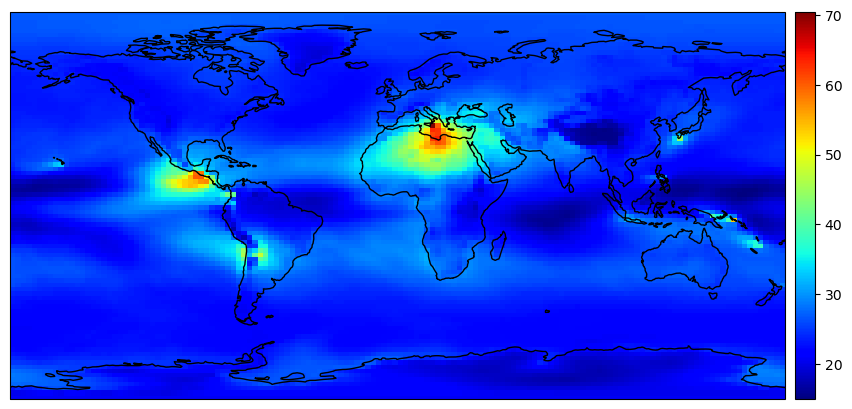

In [76]:
plot_map(su_tm_control_2d)

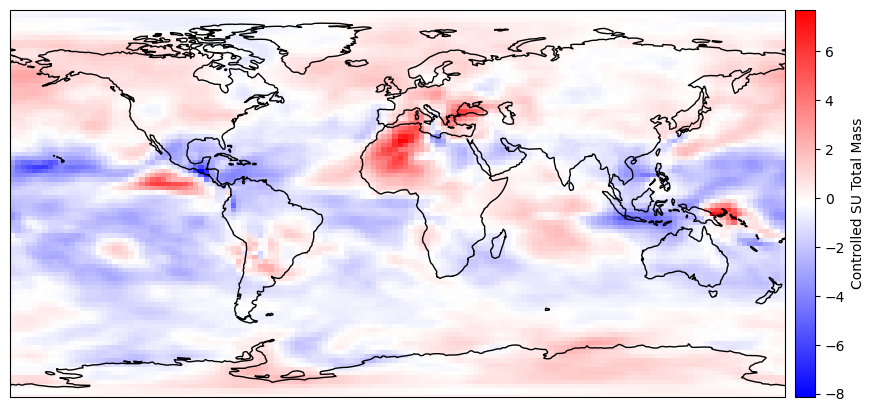

In [83]:
plot_map(su_tm_test_2d-su_tm_control_2d, cmap='bwr', label='Controlled SU Total Mass')

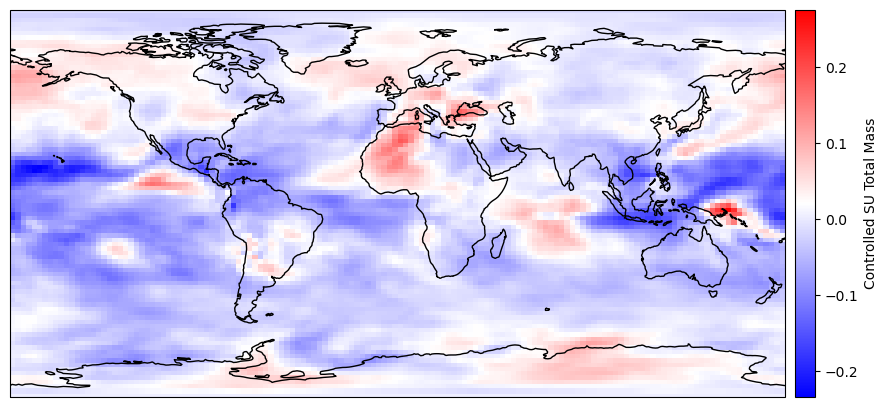

In [82]:
plot_map((su_tm_test_2d-su_tm_control_2d)/su_tm_control_2d, cmap='bwr', label='Controlled SU Total Mass')

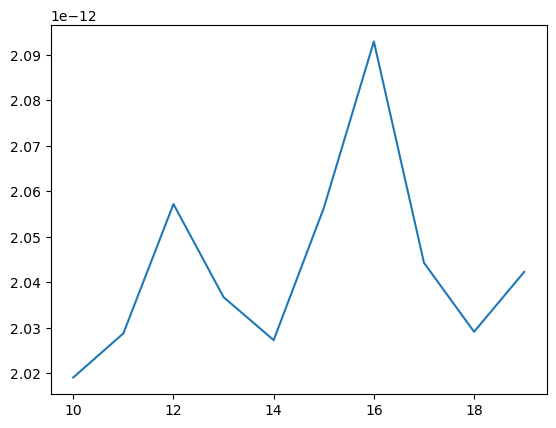

In [2]:
from matplotlib import pyplot as plt
import netCDF4

modelrun = 0
run_name = 'VLHC'+str(modelrun).zfill(3)+'kt'
fpath = 'timeseries/'+run_name+'/ANN.taij'+run_name+'.nc'

nc = netCDF4.Dataset(fpath)

plt.plot(nc['time'][10:], nc['M_ACC_SU_wet_dep'][10:])

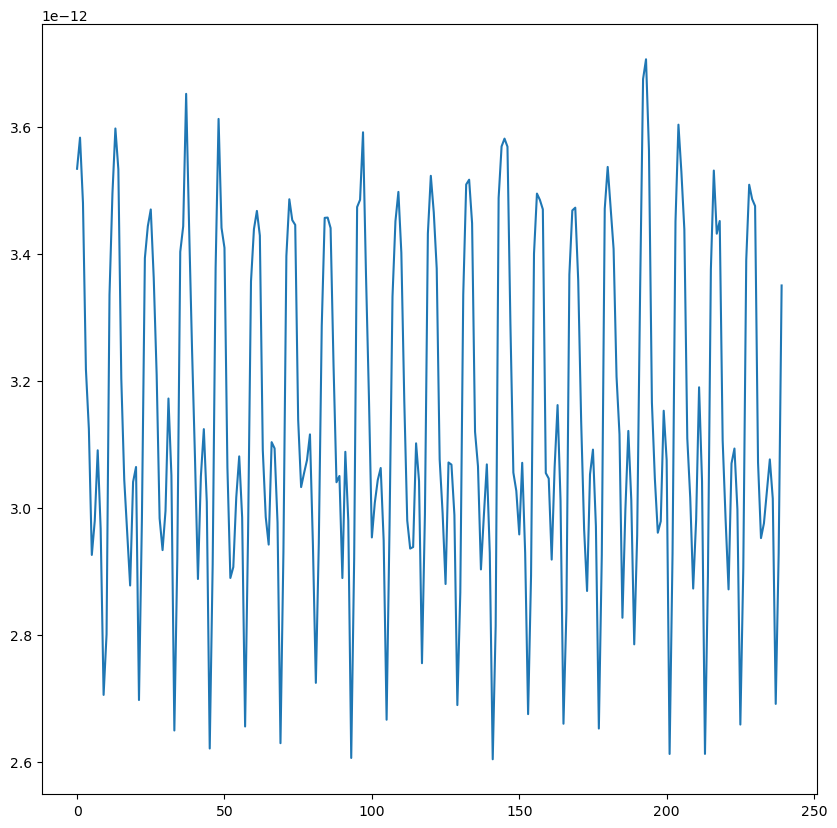

In [167]:
su_dep_vars = []
su_tm_vars = []
so2_dep_vars = ['SO2_wet_dep', 'SO2_dry_dep']

# get all deposition variables
for v in control.variables.keys():
    if 'SU_wet_dep' in v or 'SU_dry_dep' in v or 'SU_gs_dep' in v:
        su_dep_vars.append(v)
    if 'SU_Total_Mass' in v and not '_hemis' in v:
        su_tm_vars.append(v)

# sum across all modes and deposition types
su_dep_total = sum([control[v][:] for v in su_dep_vars])

plt.plot(control['time'][:], su_dep_total)

In [5]:
# checking how closely global deposition matches so2 injection

control = netCDF4.Dataset('timeseries/VLHC000kt/ANN.taijVLHC000kt.nc')
su_dep_control = sum([control[v][10:] for v in su_dep_vars])
su_dep_total_control = sum(su_dep_control)
print(su_dep_total_control)

test = netCDF4.Dataset('timeseries/VLHC001kt/ANN.taijVLHC001kt.nc')
su_dep_test = sum([test[v][:] for v in su_dep_vars])
su_dep_total_test = sum(su_dep_test)
print(su_dep_total_test)

# The deposition has units of kg/m^2/s. Here it is converted to teragrams
controlled_su_dep = su_dep_total_test-su_dep_total_control
print(controlled_su_dep*31556952*test['axyp'][0]/1e9/1.5)

3.137254236777742e-11
3.3534964952522395e-11
23.20455769592488


In [6]:
# ===================  Monthly timeseries controls and constants  ==========================
import numpy as np
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('parameters.txt', delim_whitespace=True).drop(['VLHC126kt'])

def julian_to_month(julian_day):
    months = [
        (1, 31), (2, 28), (3, 31), (4, 30), (5, 31), (6, 30),
        (7, 31), (8, 31), (9, 30), (10, 31), (11, 30), (12, 31)
    ]
    
    for month, days in months:
        if julian_day <= days:
            return month
        julian_day -= days
        
df['month'] = list(map(lambda x: julian_to_month(x), df['julday']))

control = netCDF4.Dataset('timeseries/VLHC000kt/MON.taijVLHC000kt.nc')
control_ant = netCDF4.Dataset('timeseries/VLHC000kt/MON.Antarctica.taijVLHC000kt.nc')

earth_area = control['axyp'][0]
ant_area = control_ant['axyp'][0]
s_molar_mass = 32.065
so2_mmass = 64.066
dms_mmass = 62
su_mmass = 96.06
h2so4_mmass = 98.079
s_per_year = 3.154e7
s_per_month = 2.628e6
flux_to_g = 1e3*s_per_month*earth_area
flux_to_tg = s_per_month*earth_area/1e9

su_dep_vars = []
su_tm_vars = []
so2_dep_vars = ['SO2_wet_dep', 'SO2_dry_dep']
h2so4_dep_vars = ['H2SO4_wet_dep','H2SO4_dry_dep','H2SO4_gs_dep']

# get all deposition and tm variables
for v in control.variables.keys():
    if 'SU_wet_dep' in v or 'SU_dry_dep' in v or 'SU_gs_dep' in v:
        su_dep_vars.append(v)
    if 'SU_Total_Mass' in v and not '_hemis' in v:
        su_tm_vars.append(v)

def get_10yr_monthly_control(control_vals):
    return np.array([np.sum(np.array(control_vals).reshape(10,12), axis=0)/10]*10).flatten()

su_dep_control_10yr = get_10yr_monthly_control(sum([control[v][120:] for v in su_dep_vars]))
so2_dep_control_10yr = get_10yr_monthly_control(sum([control[v][120:] for v in so2_dep_vars]))
h2so4_dep_control_10yr = get_10yr_monthly_control(sum([control[v][120:] for v in h2so4_dep_vars]))
su_tm_control_10yr = get_10yr_monthly_control(sum([control[v][120:] for v in su_tm_vars]))
so2_tm_control_10yr = get_10yr_monthly_control(control['SO2_Total_Mass'][120:])

su_dep_control_10yr_ant = get_10yr_monthly_control(sum([control_ant[v][120:] for v in su_dep_vars]))
so2_dep_control_10yr_ant = get_10yr_monthly_control(sum([control_ant[v][120:] for v in so2_dep_vars]))
h2so4_dep_control_10yr_ant = get_10yr_monthly_control(sum([control_ant[v][120:] for v in h2so4_dep_vars]))
su_tm_control_10yr_ant = get_10yr_monthly_control(sum([control_ant[v][120:] for v in su_tm_vars]))
so2_tm_control_10yr_ant = get_10yr_monthly_control(control_ant['SO2_Total_Mass'][120:])

plt.rcParams["figure.figsize"] = (10,10)

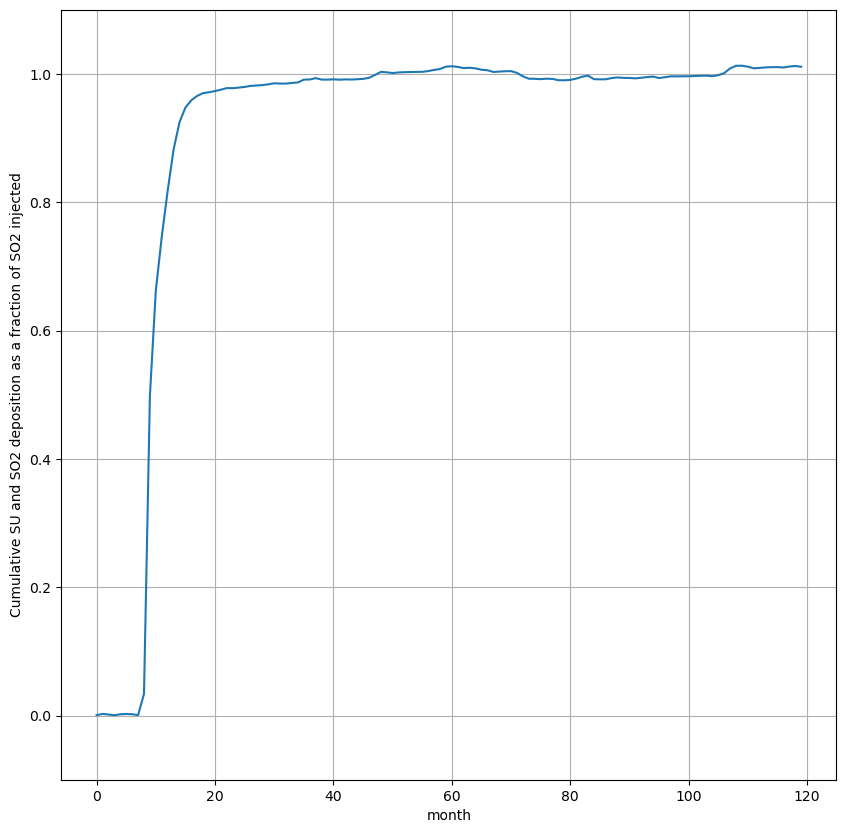

In [123]:
# su_tm_control_10yr = [su_tm_control_avg]*10
# su_tm_control_10yr = np.array(su_tm_control_10yr).flatten()

# import pandas as pd
# df = pd.read_csv('parameters.txt', delim_whitespace=True)

# su_dep_control_10yr = [su_dep_control_avg]*10
# su_dep_control_10yr = np.array(su_dep_control_10yr).flatten()

# so2_dep_control_10yr = [so2_dep_control_avg]*10
# so2_dep_control_10yr = np.array(so2_dep_control_10yr).flatten()

run = 'VLHC012kt'
test = netCDF4.Dataset('timeseries/'+run+'/MON.taij'+run+'.nc')
# test_su = sum([test[v][:] for v in su_tm_vars])-su_tm_control_10yr

test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr
test_su_dep = test_su_dep*2.628e6*test['axyp'][0]/1e9/1.5

test_so2_dep = sum([test[v][:] for v in so2_dep_vars])-so2_dep_control_10yr
test_so2_dep = test_so2_dep*2.628e6*test['axyp'][0]/1e9

test_dep = test_su_dep + test_so2_dep

cum_test_dep = np.cumsum(test_dep)
proportion = cum_test_dep/df.loc[run]['SO2']

# plt.plot(test_su, c='b')
plt.plot(proportion)
plt.ylabel('Cumulative SU and SO2 deposition as a fraction of SO2 injected')
plt.xlabel('month')
plt.ylim(-.1,1.1)
plt.grid(True)
# plt.plot(su_dep_control_10yr)

C:\Users\aspen\AppData\Local\Temp\ipykernel_29080\2327399538.py:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label=colorby)


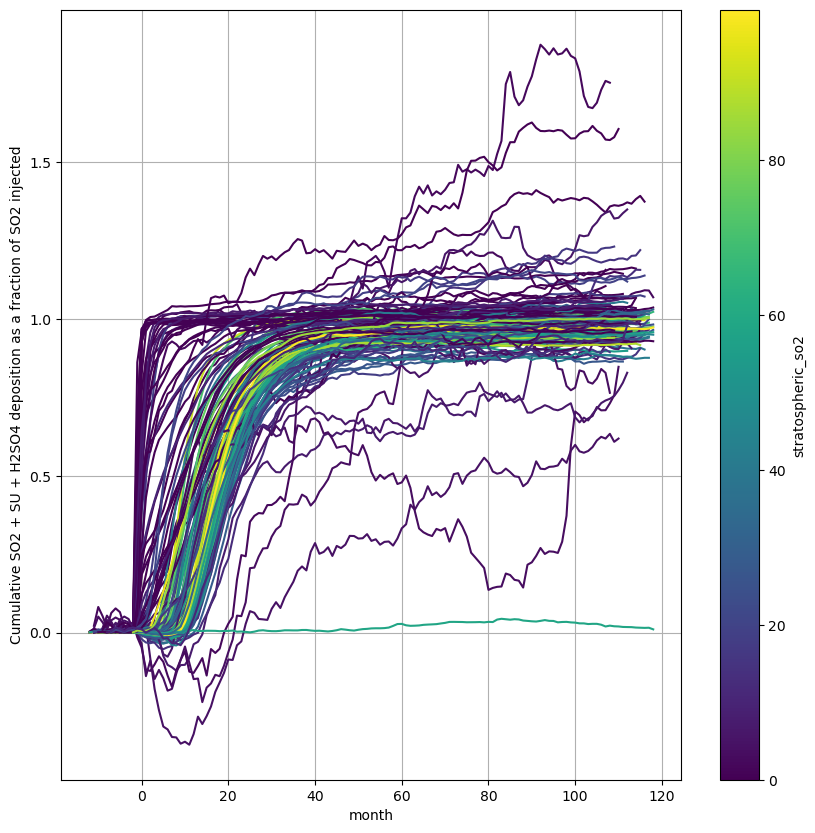

In [79]:
# pick the anomalous ones - red, brown, orange, etc - investigate

import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

viridis = mpl.colormaps['viridis']
# df = pd.read_csv('parameters.txt', delim_whitespace=True)

# def julian_to_month(julian_day):
#     months = [
#         (1, 31), (2, 28), (3, 31), (4, 30), (5, 31), (6, 30),
#         (7, 31), (8, 31), (9, 30), (10, 31), (11, 30), (12, 31)
#     ]
    
#     for month, days in months:
#         if julian_day <= days:
#             return month
#         julian_day -= days
        
# df['month'] = list(map(lambda x: julian_to_month(x), df['julday']))

colorby = 'stratospheric_so2'
cmax = max(df[colorby])
cmin = min(df[colorby])

for modelrun in range(1,141):
    run = 'VLHC'+str(modelrun).zfill(3)+'kt'
    print(run, end='\r')
    test = netCDF4.Dataset('timeseries/'+run+'/MON.taij'+run+'.nc')

    test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr
    test_su_dep = test_su_dep*flux_to_tg/su_mmass

    test_so2_dep = sum([test[v][:] for v in so2_dep_vars])-so2_dep_control_10yr
    test_so2_dep = test_so2_dep*flux_to_tg/so2_mmass

    test_h2so4_dep = sum([test[v][:] for v in h2so4_dep_vars])-h2so4_dep_control_10yr
    test_h2so4_dep = test_h2so4_dep*flux_to_tg/h2so4_mmass

    test_dep = test_su_dep + test_so2_dep + test_h2so4_dep

    cum_test_dep = np.cumsum(test_dep)
    proportion = cum_test_dep/(df.loc[run]['SO2']/so2_mmass)
#     proportion = cum_test_dep

#     if df.loc[run]['SO2'] < 12:
#         plt.plot(list(range(len(proportion)))-df.loc[run]['month'], proportion, zorder=1)
#     else:
#         plt.plot(list(range(len(proportion)))-df.loc[run]['month'], proportion, zorder=0, color='silver')
        
    plt.plot(list(range(len(proportion)))-df.loc[run]['month'], proportion, color=viridis((df.loc[run][colorby]-cmin)/(cmax-cmin)))#, zorder=int(df.loc[run][colorby]))

#     if proportion[90] > 1.3 or proportion[90] < 0.7:
#         print(run+'--')
#     plt.plot(list(range(len(proportion)))-df.loc[run]['month'], proportion)
    
# plt.ylabel('Cumulative SU deposition')# as a fraction of SO2 injected')
plt.ylabel('Cumulative SO2 + SU + H2SO4 deposition as a fraction of SO2 injected')
plt.xlabel('month')
# plt.ylim(-.1,1.5)
# plt.ylim(-.5,2)
plt.grid(True)
plt.rcParams["figure.figsize"] = (10,10)

sm = plt.cm.ScalarMappable(cmap=viridis, norm=mpl.colors.Normalize(vmin=cmin, vmax=cmax))
plt.colorbar(sm, label=colorby)

In [19]:
# test = netCDF4.Dataset('timeseries/VLHC001kt/MON.aijVLHC001kt.nc')
# control_means = netCDF4.Dataset('timeseries/VLHC001kt/MON.aijVLHC001kt.nc')

month_names = ['', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
# df = pd.read_csv('parameters.txt', delim_whitespace=True)

# For each run you need to look up the control means file using the above, then do stuff from there.


# Get tropopause heights
# Get amount of SO2 in stratosphere (8 parameters now instead of 7)
# redo scatter plots with so2 stratosphere thing
# Get deposition outputs for ML training
# Train ML model
# (separate task) Get sulfur lifetime in atmosphere

# write down a couple lines about conclusions and whatnot for each plot (keep documentation)
# just keep comments in notebook I guess? ooh you could use markdown

# from https://www.unidata.ucar.edu/blogs/developer/en/entry/accessing_netcdf_data_by_coordinates
def naive_fast(latvar,lonvar,lat0,lon0):
    # Read latitude and longitude from file into numpy arrays
    latvals = np.array([latvar[:]]*144)
    lonvals = np.array([lonvar[:]]*90).transpose()
#     ny,nx = latvals.shape
    dist_sq = (latvals-lat0)**2 + (lonvals-lon0)**2
    minindex_flattened = dist_sq.argmin()  # 1D index of min element
    iy_min,ix_min = np.unravel_index(minindex_flattened, latvals.shape)
    return iy_min,ix_min

def julian_to_month(julian_day):
    months = [(1, 31), (2, 28), (3, 31), (4, 30), (5, 31), (6, 30),
            (7, 31), (8, 31), (9, 30), (10, 31), (11, 30), (12, 31)]
    for month, days in months:
        if julian_day <= days:
            return month
        julian_day -= days

df['month'] = list(map(lambda x: julian_to_month(x), df['julday']))

def find_tropopause(row):
    monthname = month_names[int(row['month'])]
    test = netCDF4.Dataset('control_means_2d/' + monthname + '0011-0020.aijlVLHC000kt.nc')
    
    # find gridbox
    lon_idx, lat_idx = naive_fast(test['lat'], test['lon'], row['latitude'], row['longitude'])
    
    tempL = test['TempL'][:,lat_idx,lon_idx]
    z = test['z'][:,lat_idx,lon_idx]
    
    test = netCDF4.Dataset('control_means_2d/' + monthname + '0011-0020.aijVLHC000kt.nc')
    
    ttrop = test['ttrop'][lat_idx,lon_idx]
    ltrop = np.argmin(np.abs(np.array(tempL)-ttrop))
    
    return z[ltrop]

def get_stratospheric_so2(row):
    if row['plumetop'] < row['tropopause']:
        return 0
    elif row['plumebottom'] > row['tropopause']:
        return row['SO2']
    else:
        return row['SO2']*(row['plumetop']-row['tropopause'])/row['plumethickness']

def get_stratospheric_so2_pct(row):
    if row['plumetop'] < row['tropopause']:
        return 0
    elif row['plumebottom'] > row['tropopause']:
        return 1
    else:
        return (row['plumetop']-row['tropopause'])/row['plumethickness']
    
df['tropopause'] = df.apply(lambda row: find_tropopause(row), axis=1)
df['stratospheric_so2'] = df.apply(lambda row: get_stratospheric_so2(row), axis=1)
df['tropospheric_so2'] = df['SO2'] - df['stratospheric_so2']
df['stratospheric_so2_pct'] = df.apply(lambda row: get_stratospheric_so2_pct(row), axis=1)
# df = df[df['stratospheric_so2_pct']==1]
# df = df[(df['stratospheric_so2_pct']<1) & (df['stratospheric_so2_pct']>0)]
df_south = df[df['latitude'] <= -30]
df_tropic = df[(df['latitude'] > -30) & (df['latitude'] < 30)]
df_north = df[df['latitude'] >= 30]
df_tropic

# This calculation is probably fine. Could be benefited by interpolation? but probably doens't do much

,longitude,latitude,julday,plumebottom,plumethickness,SO2,H2O,plumetop,month,tropopause,stratospheric_so2,tropospheric_so2,stratospheric_so2_pct
VLHC001kt,156.441437,-14.805214,245.539017,34378.04300,1365.10010,27.408678,1793.451540,35743.1445,9,16452.398438,27.408678,0.000000,1.000000
VLHC002kt,-151.105621,18.026764,68.446114,19209.52730,9655.18750,94.524185,1698.434080,28864.7148,3,18907.917969,94.524185,0.000000,1.000000
VLHC003kt,-169.365067,19.441605,133.821228,5427.31348,5691.54785,40.002346,1258.105710,11118.8613,5,16447.373047,0.000000,40.002346,0.000000
VLHC004kt,94.327118,-29.474857,261.534149,22192.02730,9098.54102,52.311897,1820.823240,31290.5684,9,15258.015625,52.311897,0.000000,1.000000
VLHC005kt,105.957458,-4.273697,58.250629,14241.04390,6592.21143,35.907894,399.170502,20833.2559,2,18930.253906,10.365686,25.542208,0.288674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VLHC128kt,-91.487434,23.006119,194.078690,11682.09860,2632.66577,73.357437,1295.035520,14314.7646,7,16457.902344,0.000000,73.357437,0.000000
VLHC129kt,-1.505966,23.654953,131.494232,9899.82617,6022.53906,64.242294,28.693832,15922.3652,5,17707.851562,0.000000,64.242294,0.000000
VLHC130kt,163.820160,7.865601,26.442444,19018.71880,3843.20947,45.423141,243.032059,22861.9277,1,16502.171875,45.423141,0.000000,1.000000
VLHC135kt,-31.084183,-1.024757,108.663887,10051.57420,8134.56104,45.153065,977.849670,18186.1348,4,16509.738281,9.305289,35.847776,0.206083


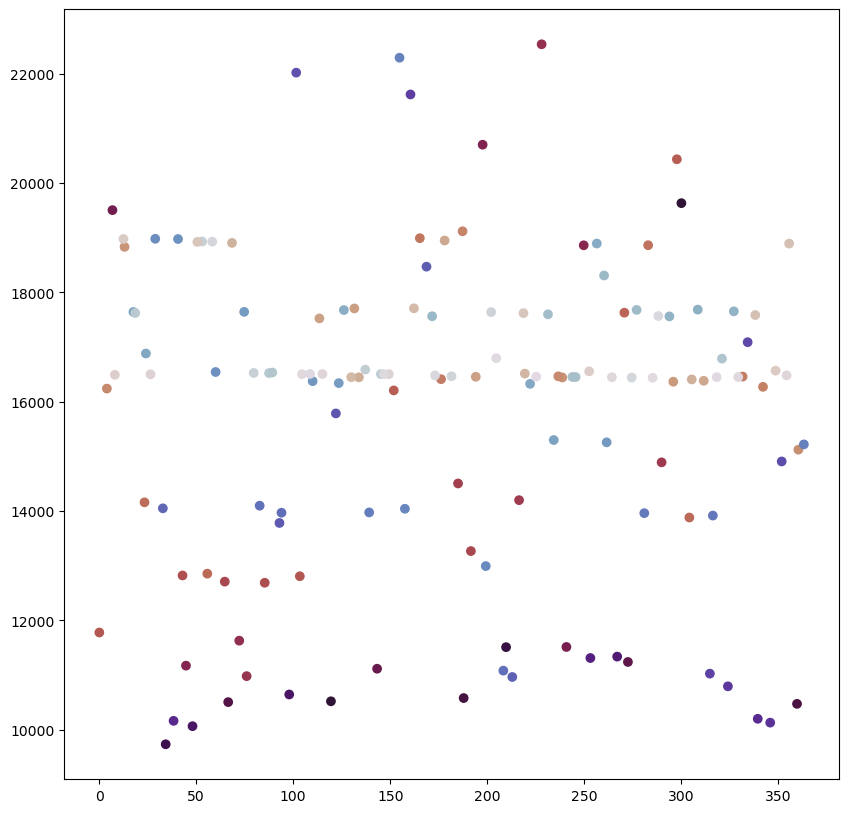

In [202]:
plt.scatter(df['julday'], df['tropopause'], c=df['latitude'], cmap='twilight_shifted')

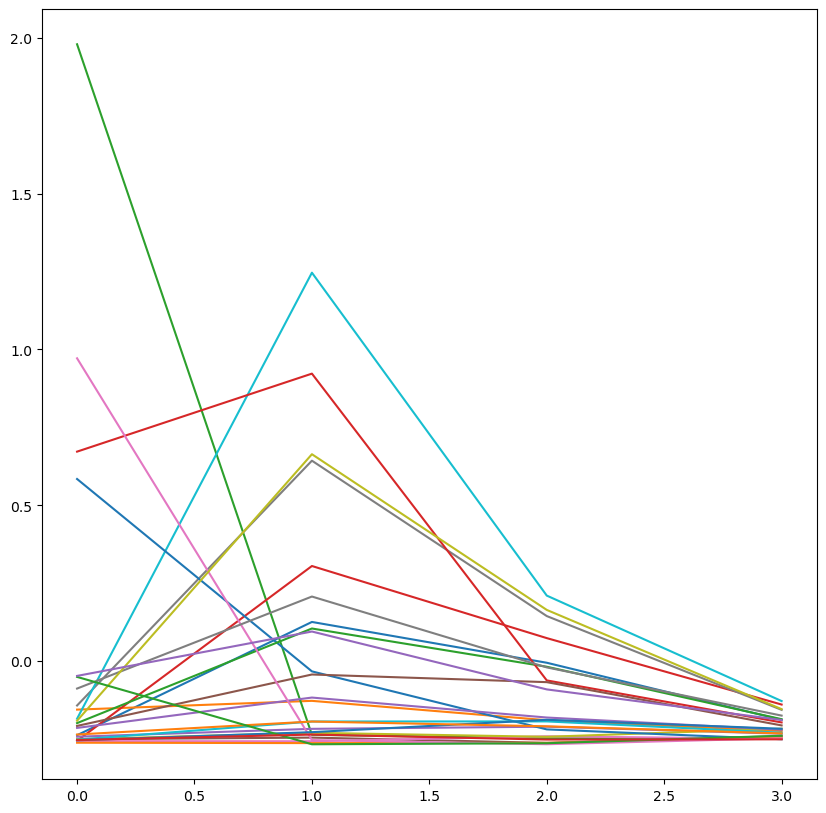

In [124]:
su_deps = []
# for modelrun in range(1,141):
#     run = 'VLHC'+str(modelrun).zfill(3)+'kt'
for run in df.index:
    print(run, end='\r')
    test = netCDF4.Dataset('timeseries/'+run+'/MON.Antarctica.taij'+run+'.nc')

    test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr_ant
    test_su_dep = test_su_dep*flux_to_tg/su_mmass
    
    m = int(df.loc[run]['month'])-1
    # shift so it's months since eruption, get first 4 years
    test_4yr_su_dep = np.sum(test_su_dep[m:len(test_su_dep)-12+m].reshape(9,12)[:4], axis=1)

    su_deps.append(test_4yr_su_dep)
    plt.plot(test_4yr_su_dep)
    
# su_deps

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['plumethickness', 'stratospheric_so2_pct', 'month', 'tropopause', 'SO2'])
y = np.array(su_deps)
# X = StandardScaler().fit_transform(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)
regr = RandomForestRegressor(random_state=6)
# regr.fit(X_train, y_train)
regr.fit(X, y)

importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

# print('Train score: ' + str(regr.score(X_train, y_train)))
# print('Test score: ' + str(regr.score(X_test, y_test)))

# plt.scatter(X['latitude'], y[:,3])

Train score: 0.9336139466969133
Test score: 0.9558801862427937


Score: 0.875688616757795
Score: 0.9344495247462261
Score: 0.9433078760265713


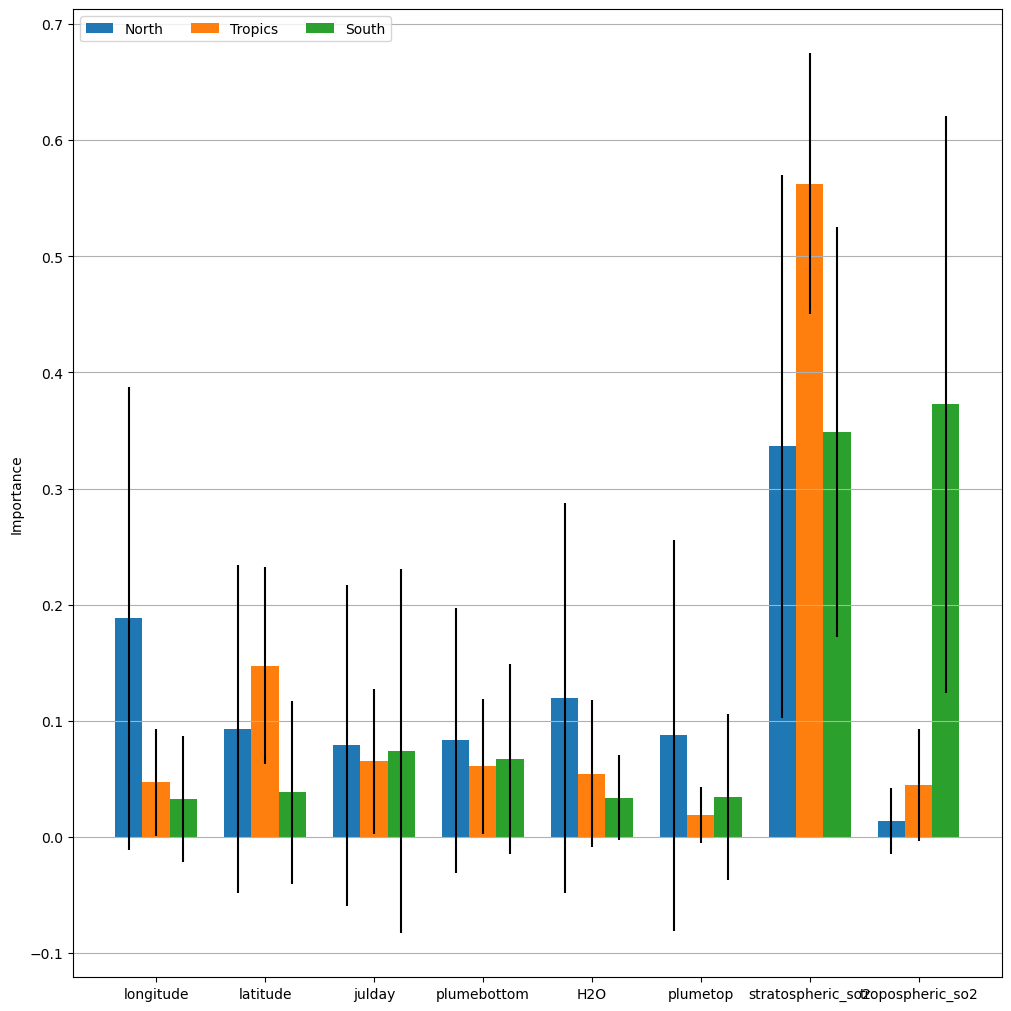

In [26]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import ElasticNet

x = np.arange(8)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

names = ['North', 'Tropics', 'South']

fig, ax = plt.subplots(layout='constrained')

# su_deps_split = []
for i,df_sub in enumerate([df_north,df_tropic,df_south]):
    su_deps = []
    for run in df_sub.index:
        print(run, end='\r')
        test = netCDF4.Dataset('timeseries/'+run+'/MON.Antarctica.taij'+run+'.nc')

        test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr_ant
        test_su_dep = test_su_dep*flux_to_tg/su_mmass

        m = int(df_sub.loc[run]['month'])-1
        # shift so it's months since eruption, get first 4 years
        test_4yr_su_dep = np.sum(test_su_dep[m:len(test_su_dep)-12+m].reshape(9,12)[:4], axis=1)

        su_deps.append(test_4yr_su_dep)
#         plt.plot(test_4yr_su_dep)
#     su_deps_split.append(su_deps)

    X = df_sub.drop(columns=['plumethickness', 'stratospheric_so2_pct', 'month', 'tropopause', 'SO2'])
    y = np.array(su_deps)
#     regr = ElasticNet(random_state=6)
    regr = RandomForestRegressor(random_state=6)
    regr.fit(X, y)
    print('Score: '+str(regr.score(X, y)))

    
#     importances = np.abs(regr.coef_)
#     print(importances)
    
    
    importances = regr.feature_importances_
    std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)
    
    
    offset = width * multiplier
    rects = ax.bar(x + offset, importances, width, label=names[i], yerr=std)
#     ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Importance')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, X.columns)
ax.legend(loc='upper left', ncols=3)
ax.grid(axis='y')
# ax.set_ylim(0, 250)

plt.show()

# 35-40 cutoff instead
# use tropospheric so2 instead of total
# so2 fitting: check inflection point stuff
# su fitting: automatically detect noisiness and don't use it

Text(0.5, 0, 'longitude')

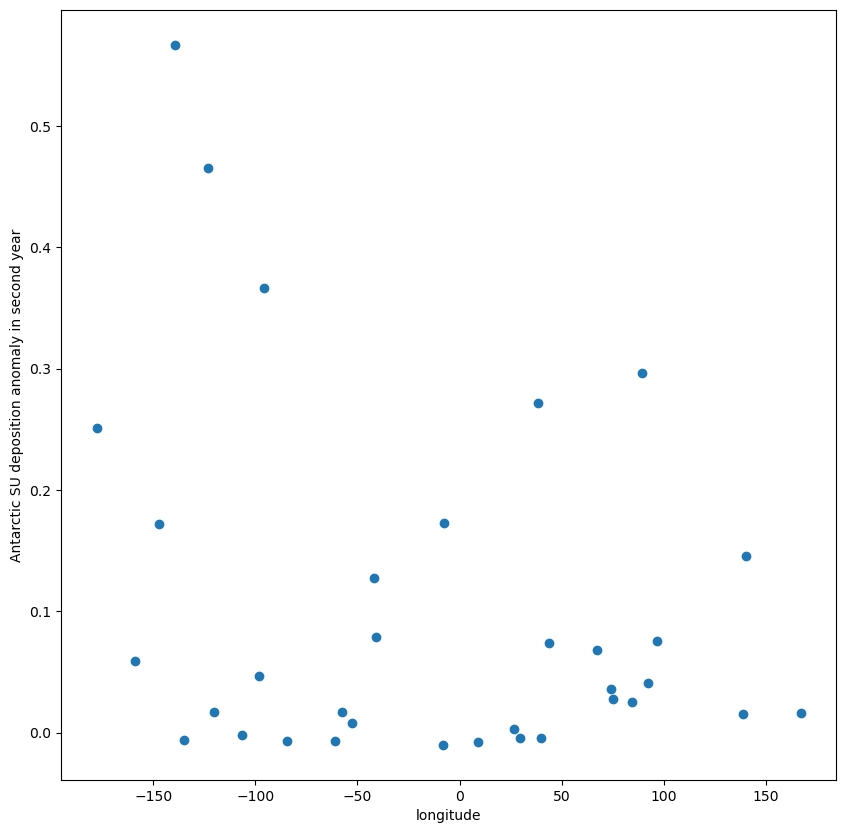

In [8]:
su_deps = []
for run in df_north.index:
    print(run, end='\r')
    test = netCDF4.Dataset('timeseries/'+run+'/MON.Antarctica.taij'+run+'.nc')

    test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr_ant
    test_su_dep = test_su_dep*flux_to_tg/su_mmass

    m = int(df_north.loc[run]['month'])-1
    # shift so it's months since eruption, get first 4 years
    test_4yr_su_dep = np.sum(test_su_dep[m:len(test_su_dep)-12+m].reshape(9,12)[:4], axis=1)

    su_deps.append(test_4yr_su_dep)

# print(su_deps[:][1])
# print(df_north['longitude'])
plt.scatter(df_north['longitude'], np.array(su_deps)[:,1])
plt.ylabel('Antarctic SU deposition anomaly in second year')
plt.xlabel('longitude')

In [153]:

print(su_deps[1][:])

[-0.24257761240005493 0.3139559328556061 0.049916014075279236
 -0.1770980805158615]


Text(0.5, 1.0, 'Split plumes, n=25')

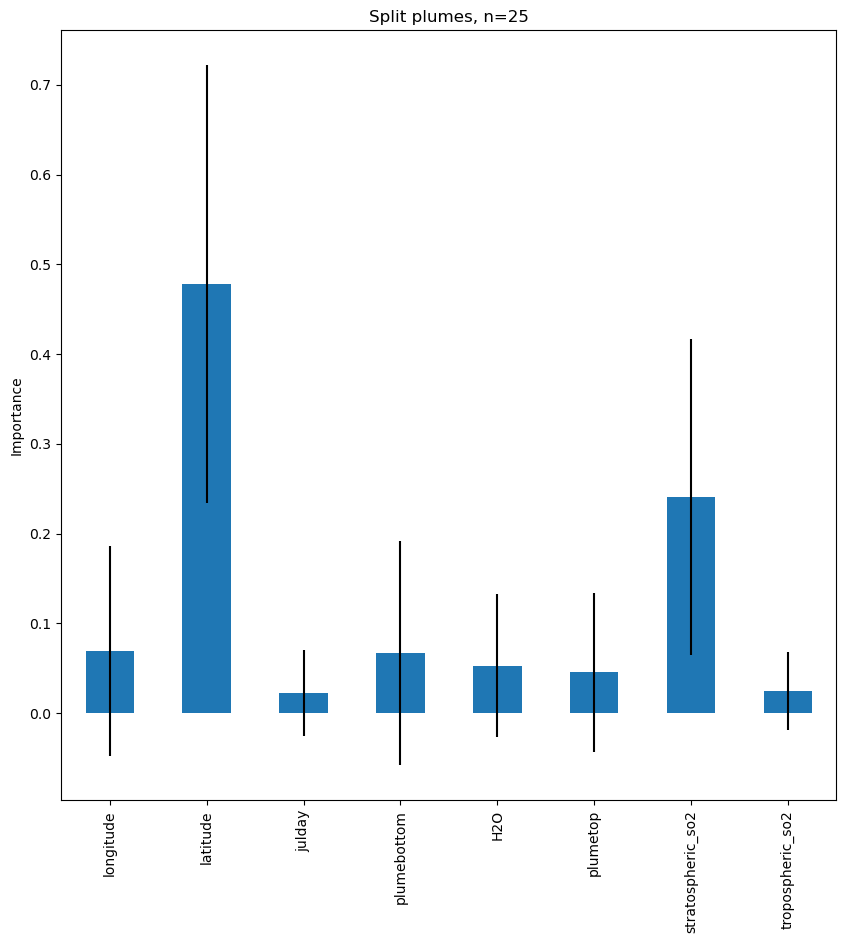

In [127]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
plt.ylabel('Importance')
plt.title('Split plumes, n=' + str(len(su_deps)))

In [38]:
# from https://www.unidata.ucar.edu/blogs/developer/en/entry/accessing_netcdf_data_by_coordinates
def naive_fast(latvar,lonvar,lat0,lon0):
    # Read latitude and longitude from file into numpy arrays
    latvals = np.array([latvar[:]]*144)
    lonvals = np.array([lonvar[:]]*90).transpose()
#     ny,nx = latvals.shape
    dist_sq = (latvals-lat0)**2 + (lonvals-lon0)**2
    minindex_flattened = dist_sq.argmin()  # 1D index of min element
    iy_min,ix_min = np.unravel_index(minindex_flattened, latvals.shape)
    return iy_min,ix_min

ncfile = netCDF4.Dataset('ANN0011-0020.aijVLHC000kt.nc', 'r')
latvar = ncfile['lat']
lonvar = ncfile['lon']
iy,ix = naive_fast(latvar, lonvar, 80.1, -139.9)
print('Closest lat lon:', latvar[ix], lonvar[iy])
# ncfile.close()

Closest lat lon: 81.0 -138.75


VLHC025kt
VLHC044kt
VLHC052kt
VLHC091kt
VLHC126kt
VLHC136kt


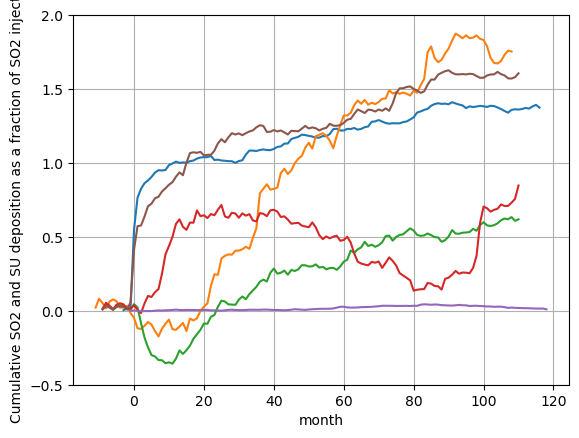

In [54]:
# su_tm_control_10yr = [su_tm_control_avg]*10
# su_tm_control_10yr = np.array(su_tm_control_10yr).flatten()

# pick the anomalous ones - red, brown, orange, etc - investigate
weird = [
    'VLHC025kt',
    'VLHC044kt',
    'VLHC052kt',
    'VLHC091kt',
    'VLHC126kt',
    'VLHC136kt',
]

# import pandas as pd
# df = pd.read_csv('parameters.txt', delim_whitespace=True)

# su_dep_control_10yr = [su_dep_control_avg]*10
# su_dep_control_10yr = np.array(su_dep_control_10yr).flatten()

# so2_dep_control_10yr = [so2_dep_control_avg]*10
# so2_dep_control_10yr = np.array(so2_dep_control_10yr).flatten()

for modelrun in range(1,141):
    run = 'VLHC'+str(modelrun).zfill(3)+'kt'
    if run in weird:
        print(run)
        test = netCDF4.Dataset('timeseries/'+run+'/MON.taij'+run+'.nc')

        test_su_dep = sum([test[v][:] for v in su_dep_vars])-su_dep_control_10yr
        test_su_dep = test_su_dep*flux_to_tg/su_mmass

        test_so2_dep = sum([test[v][:] for v in so2_dep_vars])-so2_dep_control_10yr
        test_so2_dep = test_so2_dep*flux_to_tg/so2_mmass

        test_h2so4_dep = sum([test[v][:] for v in h2so4_dep_vars])-h2so4_dep_control_10yr
        test_h2so4_dep = test_h2so4_dep*flux_to_tg/h2so4_mmass

    #     test_dep = test_so2_dep
        test_dep = test_su_dep + test_so2_dep + test_h2so4_dep

        cum_test_dep = np.cumsum(test_dep)
        proportion = cum_test_dep/(df.loc[run]['SO2']/so2_mmass)

        plt.plot(list(range(len(proportion)))-df.loc[run]['month'], proportion)
    
plt.ylabel('Cumulative SO2 and SU deposition as a fraction of SO2 injected')
plt.xlabel('month')
# plt.ylim(-.1,1.5)
plt.ylim(-.5,2)
plt.grid(True)
# plt.plot(su_dep_control_10yr)

C:\Users\aspen\AppData\Local\Temp\ipykernel_8212\2861726009.py:47: RuntimeWarning: invalid value encountered in log
  y = np.log(y)


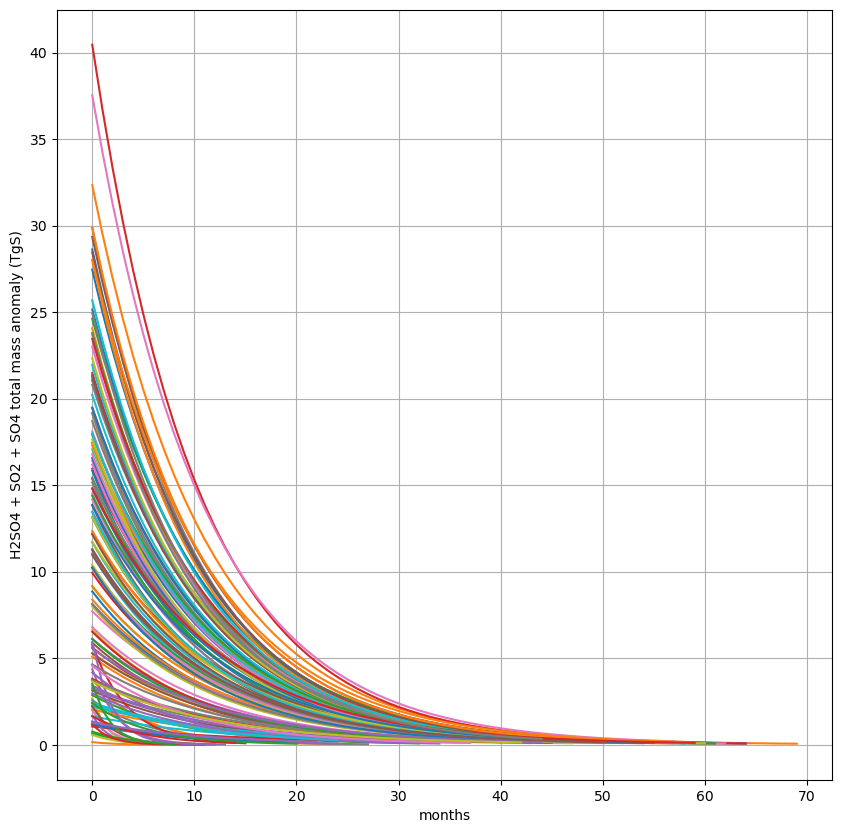

In [16]:
control = netCDF4.Dataset('timeseries/VLHC000kt/MON.taijVLHC000kt.nc')

earth_area = control['axyp'][0]
sulfur_molar_mass = 32.065
tm_factor = sulfur_molar_mass*1e3*earth_area/1e12

so2_tm_factor = tm_factor/64.066
dms_tm_factor = tm_factor/62
su_tm_factor = tm_factor/96.06
h2so4_tm_factor = tm_factor/98.079

sulfur_control = control['H2SO4_Total_Mass'][120:]*h2so4_tm_factor + control['SO2_Total_Mass'][120:]*so2_tm_factor + sum([control[v][120:] for v in su_tm_vars])*su_tm_factor

sulfur_control = np.array(sulfur_control).reshape(10,12)
sulfur_control_avg = np.sum(sulfur_control, axis=0)/10
sulfur_control_10yr = [sulfur_control_avg]*10
sulfur_control_10yr = np.array(sulfur_control_10yr).flatten()

# lifetimes = [[],[],[],[]]
lifetimes = []
# for modelrun in range(1,141):
#     w = 'VLHC'+str(modelrun).zfill(3)+'kt'
for w in df.index:
    print(w, end='\r')
    test = netCDF4.Dataset('timeseries/'+w+'/MON.taij'+w+'.nc')
#     sulfur = test['H2SO4_Total_Mass'][:]*h2so4_tm_factor + test['SO2_Total_Mass'][:]*so2_tm_factor + sum([test[v][:] for v in su_tm_vars])*su_tm_factor - sulfur_control_10yr
#     plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur)

#     sulfur = test['SO2_Total_Mass'][:]*so2_tm_factor - so2_tm_control_10yr*so2_tm_factor
    sulfur = sum([test[v][:] for v in su_tm_vars])*su_tm_factor - su_tm_control_10yr*su_tm_factor
    
    d1 = np.gradient(np.array(sulfur[:60]))
    inflection_point = np.argmin(d1)-1
    if inflection_point < 0:
        inflection_point = 0
#     sulfur = sulfur[inflection_point:]
#     sulfur_trim = sulfur[inflection_point:inflection_point+60]
    
    sulfur_trim = sulfur[inflection_point:]
    noise_point = scipy.signal.argrelextrema(sulfur_trim, np.less)[0][0]
#     print(noise_point)
    sulfur_trim = sulfur_trim[:noise_point+1]
    
    y = sulfur_trim
#     C = min(y)
    # y = y-C
    y = np.log(y)

    K, A_log = np.polyfit(np.arange(len(y))[~(y.mask)], y[~(y.mask)], 1)

    A = np.exp(A_log)
    sulfur_fit = [A * np.exp(K * t) + 0 for t in range(len(y))]
#     y_fit = [A_log + K*t for t in range(len(y))]
#     print('Lifetime: ' + str(-1/K) + ' months')


#     if df.loc[w]['month'] in [12, 1, 2]:
#         season = -1
#     elif df.loc[w]['month'] in [6, 7, 8]:
#         season = 1
#     else:
#         season = 0
        
#     if df.loc[w]['latitude'] < 45 and df.loc[w]['latitude'] > -45:
#         lifetimes[3].append(-1/K)
#     elif df.loc[w]['latitude'] >= 45:
#         lifetimes[season+1].append(-1/K)
#     else:
#         lifetimes[-season+1].append(-1/K)
    
    lifetimes.append(-1/K)
    
#     sulfur = sulfur-min(sulfur)
#     sulfur = np.log(sulfur)
#     K, A_log = np.polyfit(t, y, 1)
    
#     if inflection_point > 60:
#     plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur)
#     plt.plot(inflection_point-df.loc[w]['month'], sulfur[inflection_point], 'ro')
    plt.plot(sulfur_fit)
#     plt.plot(sulfur_trim)
    if K>0:
        print(w + '--')
#     plt.plot(sulfur)

#     if df.loc[w]['stratospheric_so2_pct'] == 0:
#         plt.plot(y, zorder=1)
#     else:
#         plt.plot(y, zorder=0, c='silver')
        
#     if y[10] < -2:
#         print(w + '--')
#         plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur, zorder=1)
#     else:
#         plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur, zorder=0, c='silver')
    
# for w in weird:
#     test = netCDF4.Dataset('timeseries/'+w+'/MON.taij'+w+'.nc')
#     sulfur = test['H2SO4_Total_Mass'][:]*h2so4_tm_factor + test['SO2_Total_Mass'][:]*so2_tm_factor + sum([test[v][:] for v in su_tm_vars])*su_tm_factor - sulfur_control_10yr
#     plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur)
    
# print(np.mean(lifetimes))
plt.ylabel('H2SO4 + SO2 + SO4 total mass anomaly (TgS)')
plt.xlabel('months')
# plt.ylim(-2,52)
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)

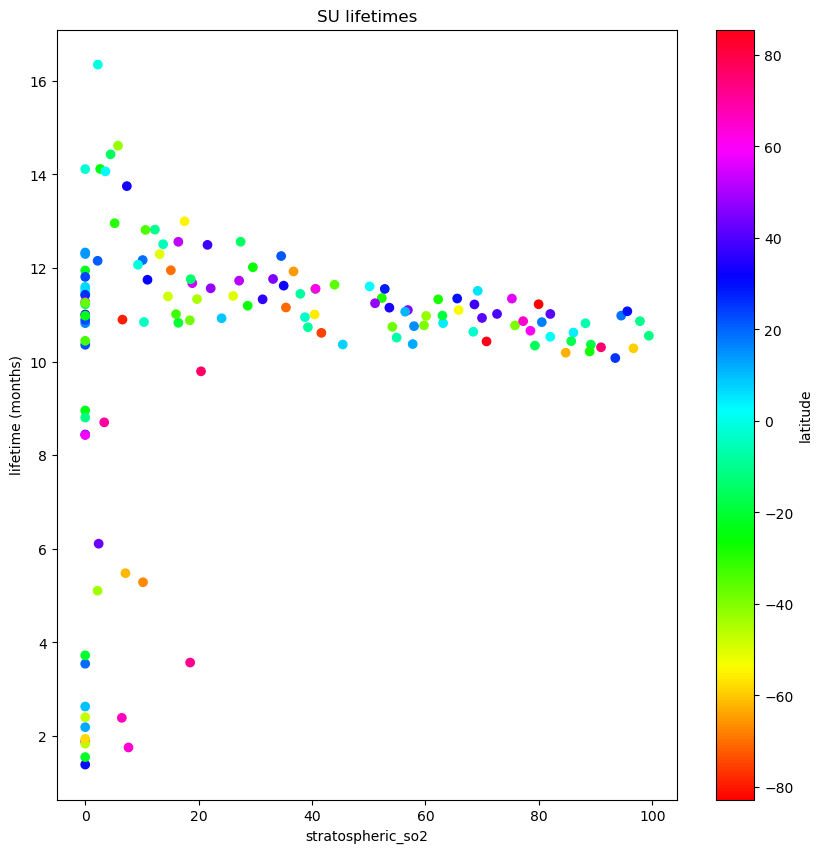

In [24]:
plt.scatter(df['stratospheric_so2'],lifetimes,c=df['latitude'], cmap='hsv')
plt.title('SU lifetimes')
plt.xlabel('stratospheric_so2')
plt.ylabel('lifetime (months)')
plt.colorbar(label='latitude')

Text(0, 0.5, 'lifetime (months)')

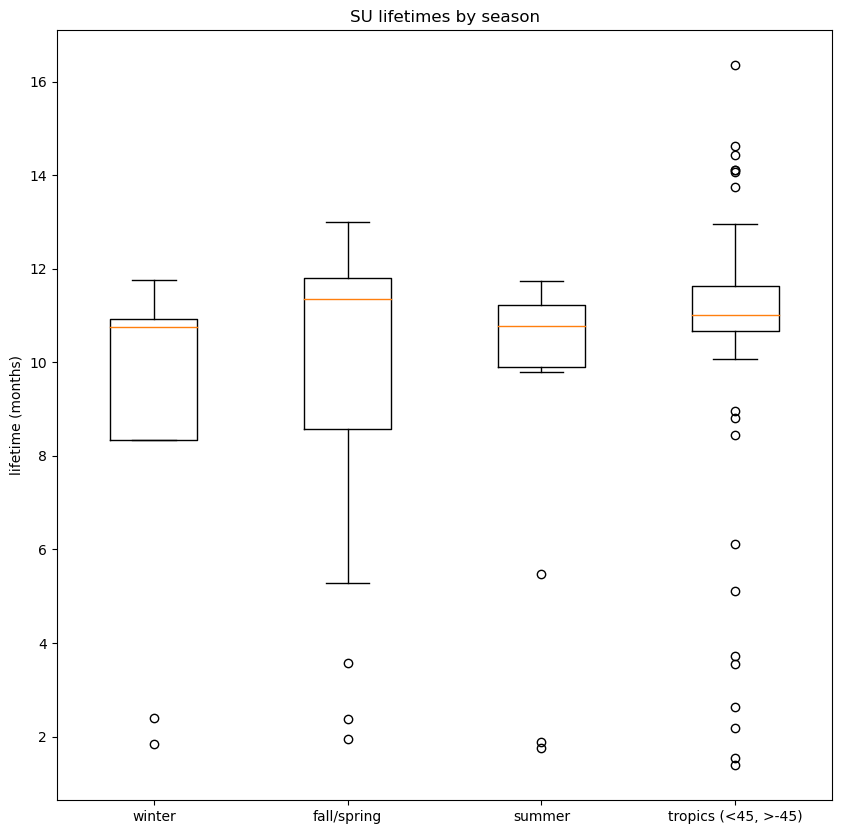

In [23]:
# plt.scatter(list(range(len(lifetimes))),lifetimes)
plt.boxplot(lifetimes)
labels = ['winter', 'fall/spring', 'summer', 'tropics (<45, >-45)']
plt.xticks(np.arange(len(labels))+1,labels)
# plt.ylim(10,18)
plt.title('SO2 lifetimes by season')
# plt.xlabel('run')
plt.ylabel('lifetime (months)')

# jja, djf, fall/spring (incorporate latitude so it's appropriate for hemisphere)
# box and whiskers
# only extratroprical - above 45 and below -45
# 4th box for all tropics

# Fix the error with the controls for ML model!!!

# and remember to also do SU lifetimes

# 6/16
# hold that box plot to discuss later - strange results (why is summer longer than winter?)

In [225]:
np.median(lifetimes)

1.0810896502872693

22
52
Lifetime: 10.933050768986167 months


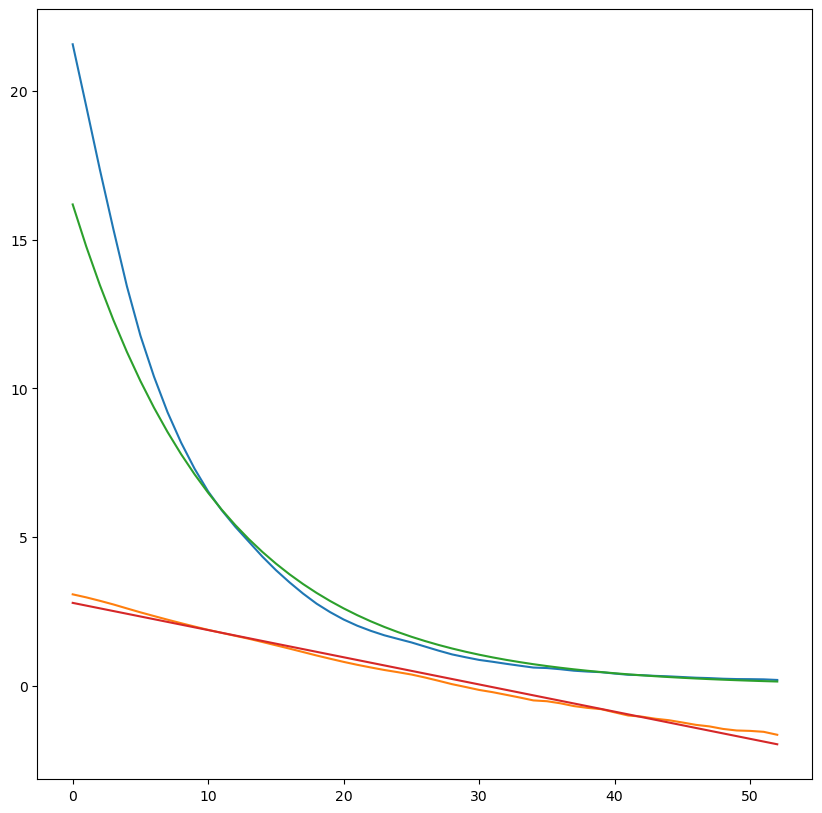

In [21]:
w = 'VLHC007kt'
print(w, end='\r')
test = netCDF4.Dataset('timeseries/'+w+'/MON.taij'+w+'.nc')
# sulfur = test['H2SO4_Total_Mass'][:]*h2so4_tm_factor + test['SO2_Total_Mass'][:]*so2_tm_factor + sum([test[v][:] for v in su_tm_vars])*su_tm_factor - sulfur_control_10yr
# sulfur = test['SO2_Total_Mass'][:]*so2_tm_factor - so2_tm_control_10yr*so2_tm_factor
sulfur = sum([test[v][:] for v in su_tm_vars])*su_tm_factor - su_tm_control_10yr*su_tm_factor

d1 = np.gradient(np.array(sulfur[:60]))
inflection_point = np.argmin(d1)-1
if inflection_point < 0:
    inflection_point = 0
# plt.plot(sulfur)
# sulfur = sulfur[inflection_point:inflection_point+10]
sulfur_trim = sulfur[inflection_point:]
noise_point = scipy.signal.argrelextrema(sulfur_trim, np.less)[0][0]
print(inflection_point)
print(noise_point)
sulfur_trim = sulfur_trim[:noise_point+1]
y = sulfur_trim
# C = min(y)
# y = y-C
y = np.log(y)

K, A_log = np.polyfit(np.arange(len(y))[~(y.mask)], y[~(y.mask)], 1)

# pfit = np.polynomial.polynomial.Polynomial.fit(list(range(len(y))), y, 1)
# pfit = pfit.convert().coef
# K = pfit[1]
# A_log = pfit[0]

A = np.exp(A_log)
sulfur_fit = [A * np.exp(K * t) + 0 for t in range(len(y))]
y_fit = [A_log + K*t for t in range(len(y))]
print('Lifetime: ' + str(-1/K) + ' months')

# pfit
# plt.plot(sulfur)

# y_th = [-pfit[1]*i + pfit[0] for i in range(len(sulfur))]
# plt.plot(sulfur)
plt.plot(sulfur_trim)
plt.plot(y)
plt.plot(sulfur_fit)
plt.plot(y_fit)

# plt.plot(inflection_point+noise_point, sulfur_trim[noise_point], 'bo')
# plt.plot(inflection_point, sulfur[inflection_point], 'ro')
# plt.plot(np.gradient(np.gradient(np.array(sulfur))))

# do SO2 only and then SU alone
# only importances plot for the 25 split - remove SO2 var and replace with 'tropospheric_so2' var - basically SO2 - stratospheric_so2
# split earth into 3 latitude chunks

In [201]:
inflection_point

-1

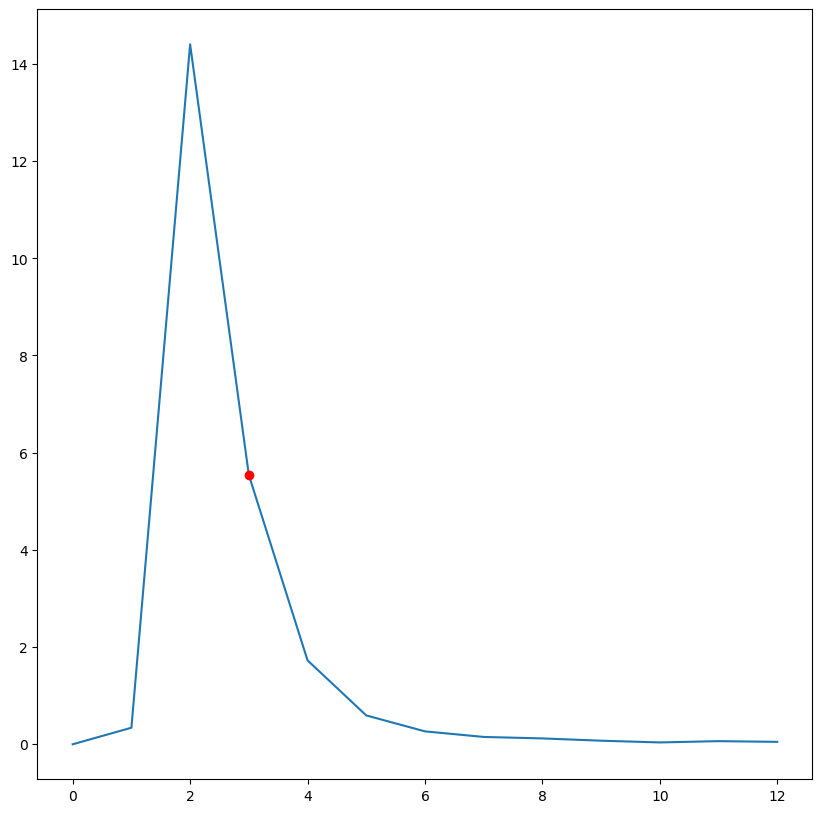

In [168]:
w = 'VLHC005kt'
print(w, end='\r')
test = netCDF4.Dataset('timeseries/'+w+'/MON.taij'+w+'.nc')
# sulfur = test['H2SO4_Total_Mass'][:]*h2so4_tm_factor + test['SO2_Total_Mass'][:]*so2_tm_factor + sum([test[v][:] for v in su_tm_vars])*su_tm_factor - sulfur_control_10yr
sulfur = test['SO2_Total_Mass'][:]*so2_tm_factor - so2_tm_control_10yr*so2_tm_factor
# sulfur = sum([test[v][:] for v in su_tm_vars])*su_tm_factor - su_tm_control_10yr*su_tm_factor

d1 = np.gradient(np.array(sulfur[:60]))
inflection_point = np.argmin(d1)
plt.plot(sulfur[:13])

plt.plot(inflection_point, sulfur[inflection_point], 'ro')
# plt.plot(np.gradient(np.gradient(np.array(sulfur))))

Text(0.5, 0, 'months')

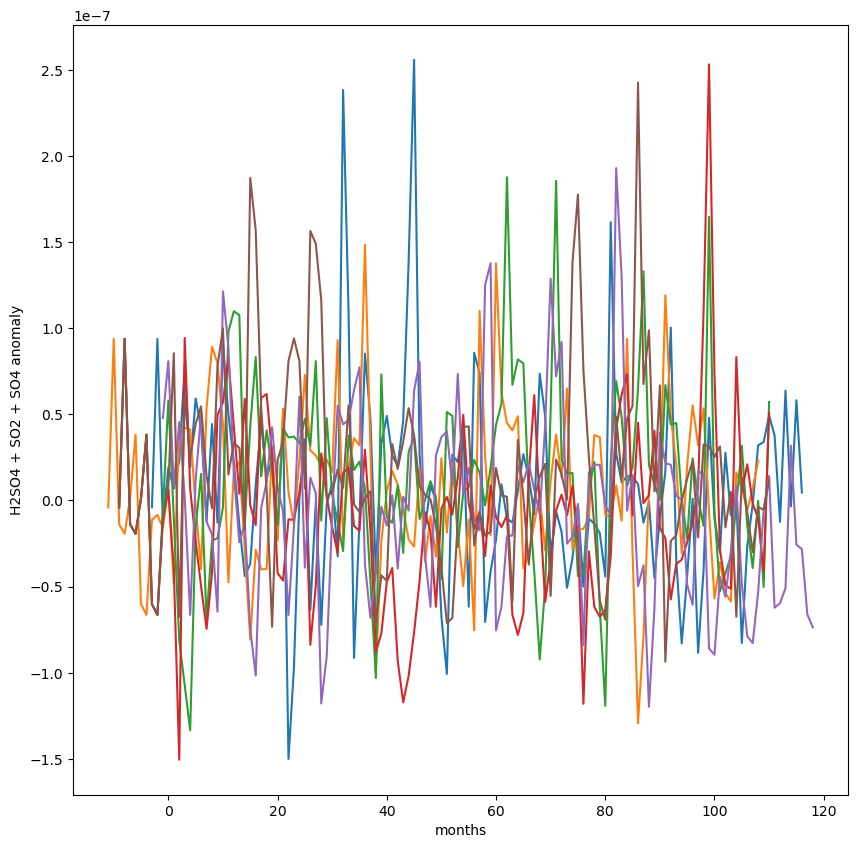

In [247]:
# Just checking that DMS isn't really affected
control = netCDF4.Dataset('timeseries/VLHC000kt/MON.taijVLHC000kt.nc')
sulfur_control = control['DMS_Total_Mass'][120:]

sulfur_control = np.array(sulfur_control).reshape(10,12)
sulfur_control_avg = np.sum(sulfur_control, axis=0)/10
sulfur_control_10yr = [sulfur_control_avg]*10
sulfur_control_10yr = np.array(sulfur_control_10yr).flatten()

for w in weird:
    test = netCDF4.Dataset('timeseries/'+w+'/MON.taij'+w+'.nc')
    sulfur = test['DMS_Total_Mass'][:] - sulfur_control_10yr
    plt.plot(list(range(len(sulfur)))-df.loc[w]['month'], sulfur)
    
plt.ylabel('DMS anomaly')
plt.xlabel('months')

{'VLHC025kt': array([1.        , 1.01400311, 1.01376749, 1.03708068, 1.00494147]), 'VLHC044kt': array([1.        , 1.01760695, 1.01742755, 0.97404476, 1.00263422]), 'VLHC052kt': array([1.        , 1.00175247, 1.0011813 , 0.98170801, 1.00132153]), 'VLHC091kt': array([1.        , 1.00570734, 1.00515618, 0.99711448, 0.99234885]), 'VLHC126kt': array([1.        , 1.01071151, 1.01040076, 0.99454967, 1.00340124]), 'VLHC136kt': array([1.        , 1.01260735, 1.01250025, 1.00388826, 0.99710498])}


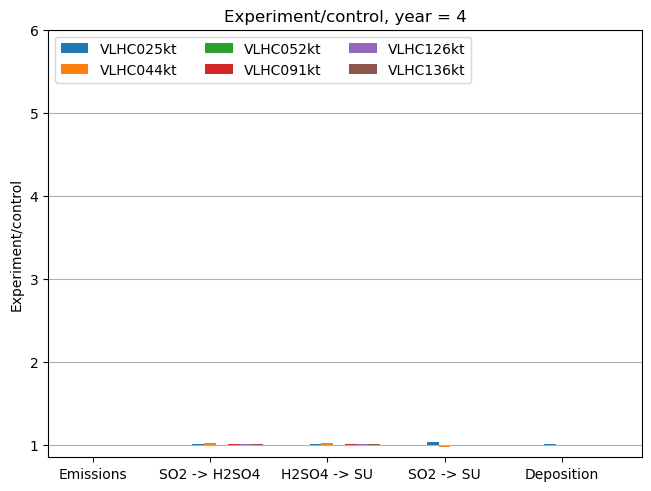

In [31]:
# Find total mass of sulfur

# Total masses: Use Teragrams of Sulfur - divide all by molecular mass then multiply by 32
# Fluxes: Teragrams of sulfur m^-2 s^-1
# can change teragrams to gigagrams
# lifetime - days

# bar plot: include lifetimes
# also make one with normal runs

# nearest neighbor calculation:
# For each weird one, find the closest normal looking one and make the other bar plot with that

# Remember to add h2so4 deposition too

# 3rd bar plot: do it with six different other years to check variability (use each year as if it is an experiment)

# Experiment over control (ratio)

# do line plot with total mass of sum of h2so4, so2, and SU

# plot dms too just to check

# for bar plot, use last year in sim

import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import scipy
weird = [
    'VLHC025kt',
    'VLHC044kt',
    'VLHC052kt',
    'VLHC091kt',
    'VLHC126kt',
    'VLHC136kt',
]

diags = {
    'Emissions': [
        'SO2_AGR_CMIP6_src',
        'SO2_ENE_CMIP6_src',
        'SO2_IND_CMIP6_src',
        'SO2_RCO_CMIP6_src',
        'SO2_SHP_CMIP6_src',
        'SO2_SLV_CMIP6_src',
        'SO2_TRA_CMIP6_src',
        'SO2_WST_CMIP6_src',
        'SO2_aircraft_src',
        'SO2_biomass_src',
        'SO2_volcanic_src',
        'SU_AGR_CMIP6_src',
        'SU_ENE_CMIP6_src',
        'SU_IND_CMIP6_src',
        'SU_RCO_CMIP6_src',
        'SU_SHP_CMIP6_src',
        'SU_SLV_CMIP6_src',
        'SU_TRA_CMIP6_src',
        'SU_WST_CMIP6_src',
        'SU_aircraft_src',
        'SU_biomass_src',
        'SU_volcanic_src',
    ],
    'SO2 -> H2SO4': [
        'SO2_chem_sink',
    ],
    'H2SO4 -> SU': [
        'AMP_src_M_',
    ],
    'SO2 -> SU': [
        'SO2_aqchem',
    ],
    'Deposition': [
        'H2SO4_wet_dep',
        'H2SO4_dry_dep',
        'H2SO4_gs_dep',
        'SU_wet_dep',
        'SU_dry_dep',
        'SU_gs_dep',
        'SO2_wet_dep',
        'SO2_dry_dep',
    ],
}

# df_trim = pd.read_csv('parameters.txt', delim_whitespace=True).iloc[:, :-1]
# df_cut = df_trim.drop(weird)
# kdtree = scipy.spatial.KDTree(df_cut)
# weird = [df_cut.iloc[kdtree.query(df_trim.loc[w])[1]].name for w in weird]

y = 4
control = netCDF4.Dataset('timeseries/VLHC000kt/ANN.taijVLHC000kt.nc')
earth_area = control['axyp'][y]
sulfur_molar_mass = 32.065
s_per_year = 3.154e7

flux_factor = sulfur_molar_mass*1e3/1e12
so2_factor = flux_factor/64.066
dms_factor = flux_factor/62
su_factor = flux_factor/96.06
h2so4_factor = flux_factor/98.079

def get_diags(run):
#     print('\n'+run)
    test = netCDF4.Dataset('timeseries/'+run+'/ANN.taij'+run+'.nc')
    totals = []
    for k,vs in diags.items():
        total = 0
        for v in vs:
#             modes = [x for x in test.variables.keys() if v in x]
#             print(modes)
            if 'SU' in v:
                factor = su_factor
            elif 'SO2' in v:
                factor = so2_factor
            elif 'H2SO4' in v:
                factor = h2so4_factor
            if k == 'H2SO4 -> SU':
                val = sum([test[x][y]*factor for x in test.variables.keys() if v in x and '_SU' in x])
            else:
                val = sum([test[x][y]*factor for x in test.variables.keys() if v in x])
#             val = sum([abs(test[x][y])*su_factor for x in test.variables.keys() if v in x])
#             print(v+': '+str(val))
            total += val
#         print(k)
#         print(total)
        totals.append(total)
    return np.array(totals)

control_diags = get_diags('VLHC000kt')
weird_diags = {}
for i,w in enumerate(weird):
    weird_diags[w] = get_diags(w)/control_diags

print(weird_diags)

x = np.arange(len(diags.keys()))
width = 0.1
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in weird_diags.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement-1, width, label=attribute, bottom=1)
#     ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Experiment/control')
ax.set_title('Experiment/control, year = ' + str(y))
ax.set_xticks(x + width, diags.keys())
ax.legend(loc='upper left', ncols=3)
ax.grid(axis='y')
ax.set_ylim(0.85, 6)

# plt.grid(True)
plt.show()

In [4]:
import scipy
import pandas as pd

df_trim = pd.read_csv('parameters.txt', delim_whitespace=True).iloc[:, :-1]

kdtree = scipy.spatial.KDTree(df_trim)
kdtree.query([4,9,252,6592,1263,37,1482])

(1.3552192920186192, 48)

In [12]:
df_trim.iloc[kdtree.query(df_trim.loc['VLHC049kt'])[1]].name

'VLHC049kt'

In [28]:
weird

['VLHC039kt', 'VLHC043kt', 'VLHC051kt', 'VLHC122kt', 'VLHC100kt', 'VLHC128kt']

In [119]:
so2_control_10yr = [so2_tm_control_avg]*10
so2_control_10yr = np.array(so2_control_10yr).flatten()

test = netCDF4.Dataset('timeseries/VLHC100kt/MON.taijVLHC100kt.nc')
test_so2 = test['SO2_Total_Mass'][:]-so2_control_10yr
plt.plot(test_so2)
# plt.plot(so2_control_10yr, c='r')
# plt.plot(so2_tm_control, c='g')
# plt.plot(test['SO2_Total_Mass'][:])
plt.xlabel('months')
plt.ylabel('SO2 total mass')

NameError: name 'so2_tm_control_avg' is not defined

Text(0, 0.5, 'SU total mass')

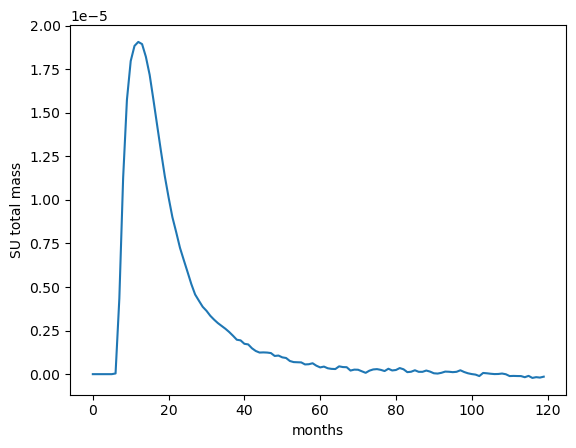

In [22]:
# so2_control_10yr = [so2_tm_control_avg]*10
# so2_control_10yr = np.array(so2_control_10yr).flatten()

test = netCDF4.Dataset('timeseries/VLHC100kt/MON.taijVLHC100kt.nc')
test_su_tm = sum([test[v][:] for v in su_tm_vars]) - su_tm_control
plt.plot(test_su_tm)
plt.xlabel('months')
plt.ylabel('SU total mass')

In [ ]:
for modelrun in range(1,141):
    print(modelrun, end='\r')
    run_name = 'VLHC'+str(modelrun).zfill(3)+'kt'
    
    fpath = 'timeseries/'+run_name+'/ANN.Antarctica.taij'+run_name+'.nc'
    nc = netCDF4.Dataset(fpath)
    su_dep_antarctic.append(sum(sum([nc[v][:] for v in su_dep_vars])) - su_dep_antarctic_control)

In [ ]:
# above plot with monthly data
# 
# calculate how soon after eruption you have 90% of the 10 year dep
# check whether deposition after 10 years matches so2 ejected (change units! different molecular weights)

# THE QUESTION: as a function of latitude, how much of the total SO2 injected is deposited in antarctica?

# q: how to do control? how to calculate it?
# also: What are the units of SO2 in parameters.txt
# do I even need to use SO2? Why not just the proportion of antarctic to global deposition?

Text(0, 0.5, '% of SO2 deposited in Antarctica')

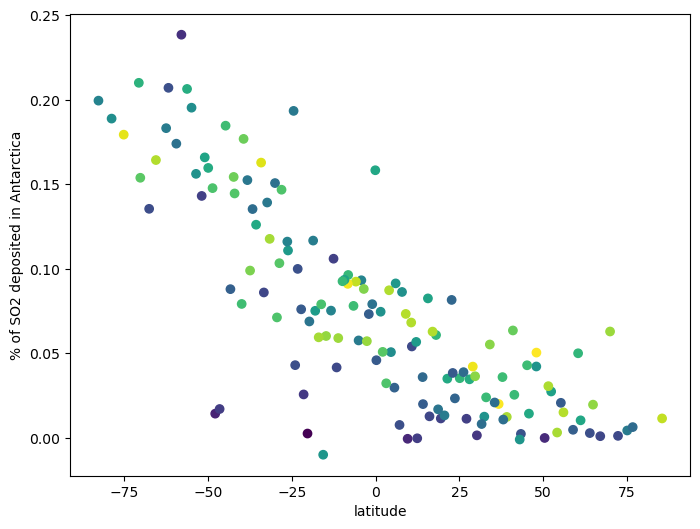

In [120]:
import numpy as np

# df = pd.read_csv('parameters.txt', delim_whitespace=True)

# control depositions for antarctica
antarctic_control = netCDF4.Dataset('timeseries/VLHC000kt/ANN.Antarctica.taijVLHC000kt.nc')
su_dep_antarctic_control = sum(sum([antarctic_control[v][10:] for v in su_dep_vars]))

antarctic_area = antarctic_control['axyp'][0]
 
# global_control = netCDF4.Dataset('timeseries/VLHC000kt/ANN.taijVLHC000kt.nc')
# su_dep_global_control = sum(sum([global_control[v][10:] for v in su_dep_vars]))

su_dep_antarctic = []
su_dep_global = []
for modelrun in range(1,141):
    print(modelrun, end='\r')
    run_name = 'VLHC'+str(modelrun).zfill(3)+'kt'
    
    fpath = 'timeseries/'+run_name+'/ANN.Antarctica.taij'+run_name+'.nc'
    nc = netCDF4.Dataset(fpath)
    su_dep_antarctic.append(sum(sum([nc[v][:] for v in su_dep_vars])) - su_dep_antarctic_control)
    
#     fpath = 'timeseries/'+run_name+'/ANN.taij'+run_name+'.nc'
#     nc = netCDF4.Dataset(fpath)
#     su_dep_global.append(sum(sum([nc[v][:] for v in su_dep_vars])) - su_dep_global_control)

proportion = (31556952*antarctic_area*np.array(su_dep_antarctic)/1e9/96.06)/(np.array(df['SO2'])/64.066)
# proportion = np.array(su_dep_antarctic)/np.array(su_dep_global)
plt.scatter(df['latitude'], proportion,c=df['plumetop'])
plt.xlabel('latitude')
plt.ylabel('% of SO2 deposited in Antarctica')

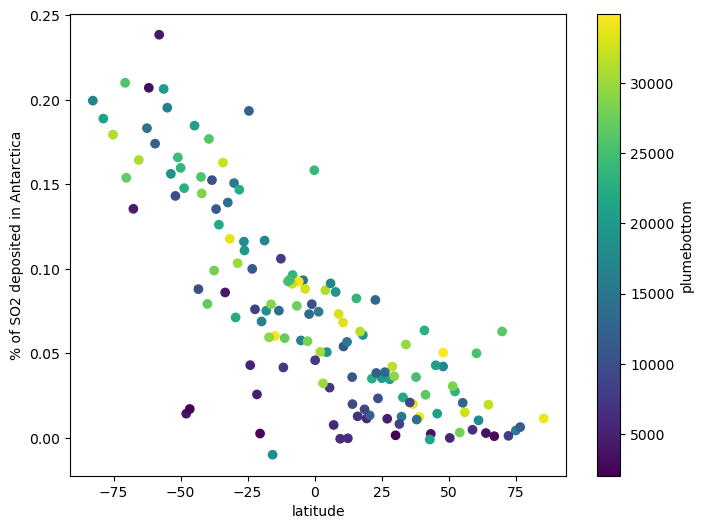

In [123]:
plt.scatter(df['latitude'], proportion,c=df['plumebottom'])
plt.xlabel('latitude')
plt.ylabel('% of SO2 deposited in Antarctica')
plt.colorbar(label='plumebottom')

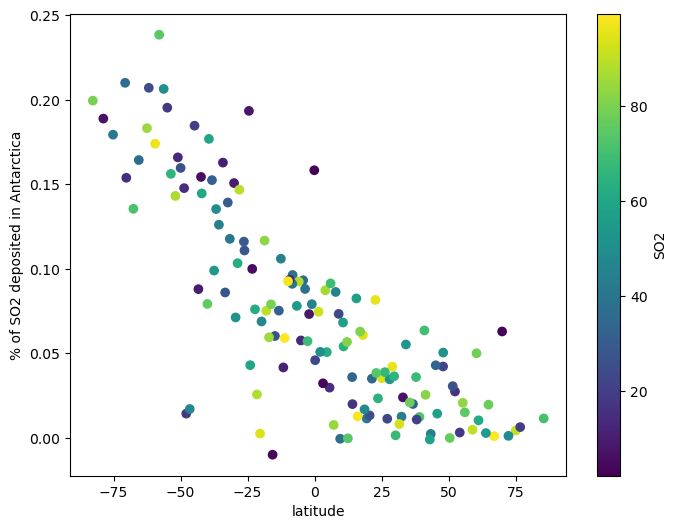

In [124]:
plt.scatter(df['latitude'], proportion,c=df['SO2'])
plt.xlabel('latitude')
plt.ylabel('% of SO2 deposited in Antarctica')
plt.colorbar(label='SO2')

(-10.0, 10.0)

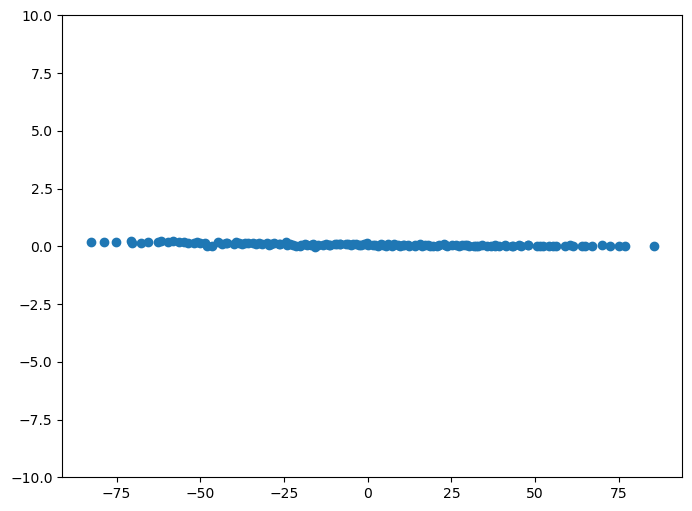

In [117]:
plt.scatter(df['latitude'], proportion,)
plt.ylim(-10,10)

Text(0, 0.5, 'Integrated SU deposition')

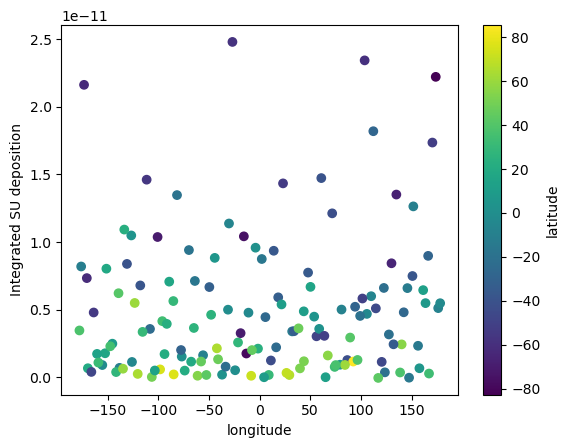

In [51]:
xvar = 'longitude'
cvar = 'latitude'

plt.scatter(df[xvar], su_dep, c=df[cvar],)
plt.colorbar(label=cvar)
plt.xlabel(xvar)
plt.ylabel('Integrated SU deposition')

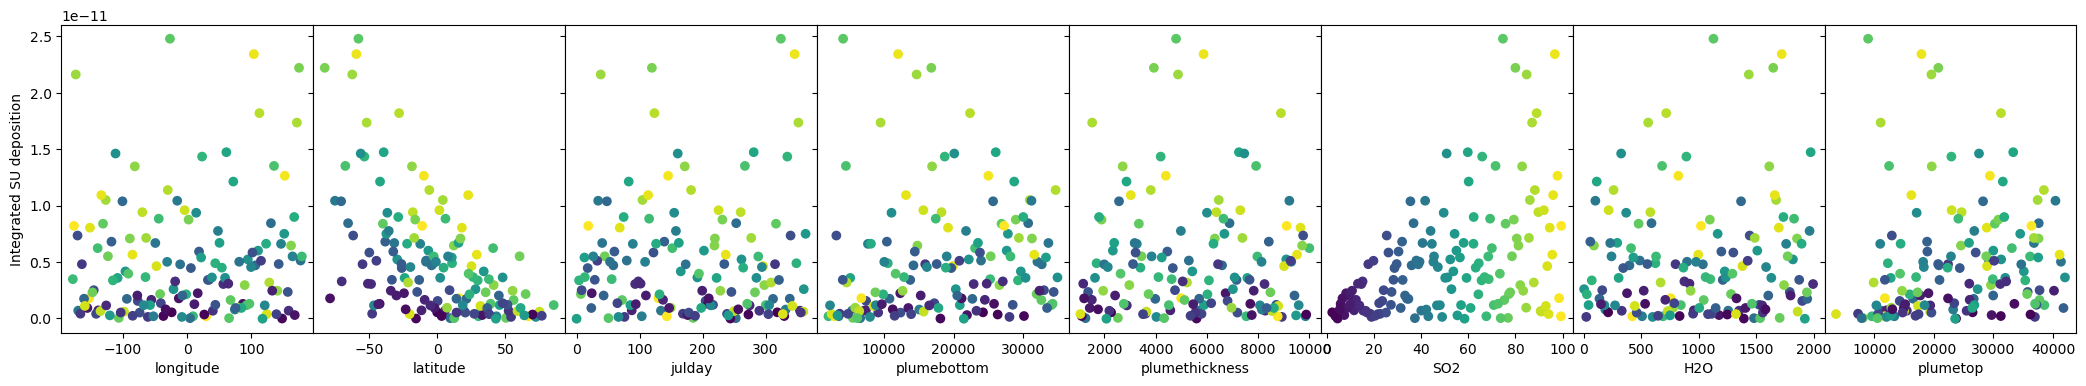

In [82]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(26,4))

for i,ax in enumerate(axs):
    ax.scatter(df.iloc[:,i], su_dep, c=df['SO2'])
    ax.set_xlabel(df.columns[i])
    
axs[0].set_ylabel('Integrated SU deposition')
# fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

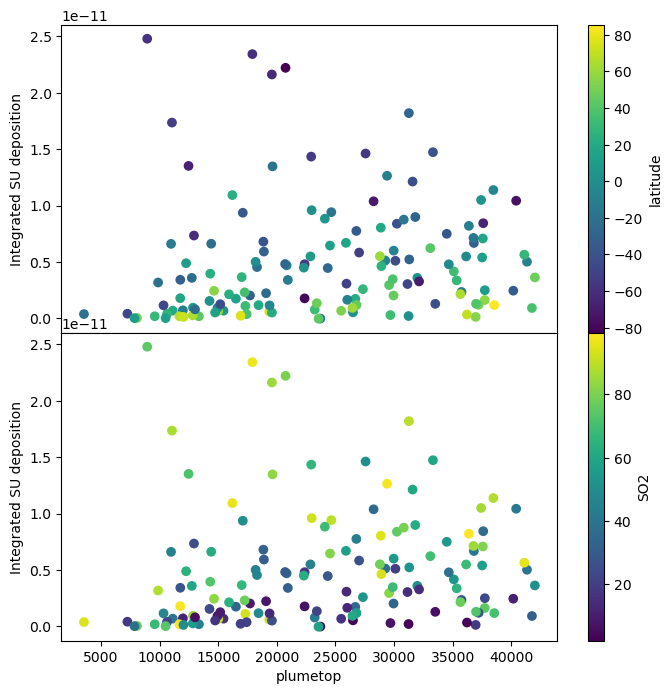

In [81]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

im = axs[0].scatter(df['plumetop'], su_dep, c=df['latitude'])
axs[0].set_xlabel('plumetop')
fig.colorbar(im, ax=axs[0], label='latitude')

im = axs[1].scatter(df['plumetop'], su_dep, c=df['SO2'])
axs[1].set_xlabel('plumetop')
fig.colorbar(im, ax=axs[1], label='SO2')
    
axs[0].set_ylabel('Integrated SU deposition')
axs[1].set_ylabel('Integrated SU deposition')

plt.subplots_adjust(wspace=0, hspace=0)

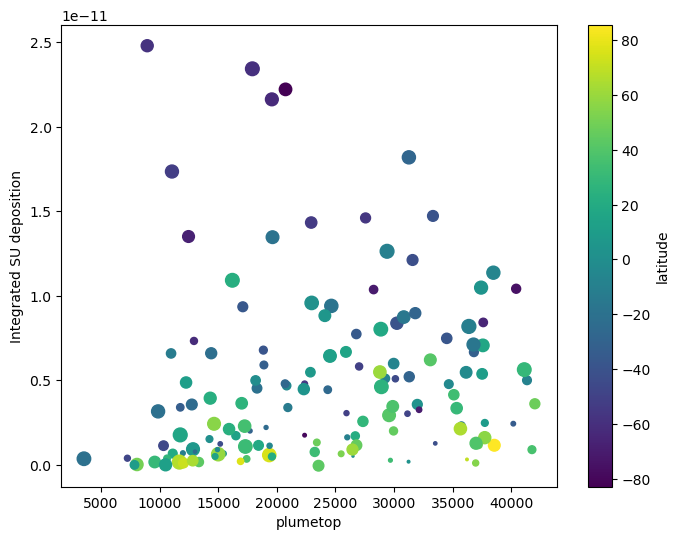

In [79]:
plt.rcParams["figure.figsize"] = (8,6)
im = plt.scatter(df['plumetop'], su_dep, c=df['latitude'], s=df['SO2'])
plt.xlabel('plumetop')
plt.ylabel('Integrated SU deposition')
plt.colorbar(im, label='latitude')

In [9]:
def ncdf_units(units, txt=False):
    from sys import exit

    units_str = units
    try:
        space = units_str.index(' ')
    except:
        space = -1

    # mixed case
    if (space == -1): # space does not exist
        if ((units_str.upper() != units_str.lower()) or \
            (units_str == '%')): # text only or % sign.
            if txt:
                return units_str
            else:
                return 1.
        # else not needed, just continue to number only case
    else: # space found
        units_txt = units_str[space+1:len(units_str)]
        units_str = units_str[0:space]
        if (units_str.upper() != units_str.lower()): # space exists, but everything is text
            if txt:
                return units_str
            else:
                return 1.
        else:
            if txt:
                return units_txt
            # else not needed, just continue to number only case

    # number only case
    if txt:
        return ''
    try:
        exponent_start = units_str.index('^')
    except:
        exponent_start = -1

    if (exponent_start == -1): # floating point
        try:
            dot_pos = units_str.index('.')
        except:
            dot_pos = -1
        if (len(units_str) == 0): # blank string, return 1
            return 1.
        elif (dot_pos != -1): # floating point
            return float(units_str)
        elif (units_str == '1'): # 1, assume unitless
            return 1.
        else: # ERROR - EXIT
            exit('Cannot understand units "' + units_str + '". Exiting...')
    else: # exponent
        try:
            exponent_end = units_str.index(' ')
        except:
            exponent_end = len(units_str) - 1
        exponent_size = exponent_end - exponent_start
        exponent_base = float(units_str[0:exponent_start])
        exponent_power = float(units_str[-exponent_size:])

        return exponent_base**exponent_power
    
ncdf_units(nc['M_ACC_SU_Total_Mass'].units, txt=False) * 8000000000

800.0